In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB

In [2]:
data=pd.read_csv('heart_2020_cleaned.csv')
data

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [3]:
df1=pd.DataFrame(data)
df1

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# HeartDisease      :آیا بیماری قلبی دارد یا نه؟
# BMI               :شاخص توده بدن که نسبت وزن به قد بیمار را بررسی میکند
# Smoking           :سیگاری بودن یا نبودن بیمار
# AlcoholDrinking   :مصرف الکل
# Stroke            :سابقه سکته
# PhysicalHealth    :سلامت جسمی
# MentalHealth      :سلامت ذهنی
# DiffWalking       :آیا در راه رفتن یا بالا رفتن از پله ها مشکل جدی دارد؟
# Sex               :جنسیت بیمار
# AgeCategory       :رده سنی (چهارده نوع)
# Race              :نژاد و قومیت
# Diabetic          :آیا تا کنون سابقه دیابت داشته است؟
# PhysicalActivity  :آیا طی 30 روز گذشته به جز شغل معمولی خود ورزش نیز داشته اند؟
# GenHealth         :از نظر خودتان سلامتیتان چگونه است؟
# SleepTime         :به صورت میانگین چند ساعت در طول شبانه روز میخوابید؟
# Asthma            :آیا تا کنون سابقه آسم داشته اید؟
# KidneyDisease     :به جز سنگ کلیه و عفونت و بی اختیاری آیا تا کنون بیماری کلیوی داشته اید؟
# SkinCancer        :آیا سرطان پوست دارید؟







# target = HeartDisease

In [6]:
df1.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [7]:
df1.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# First Look :

In [8]:
df1.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

<AxesSubplot:xlabel='PhysicalHealth', ylabel='count'>

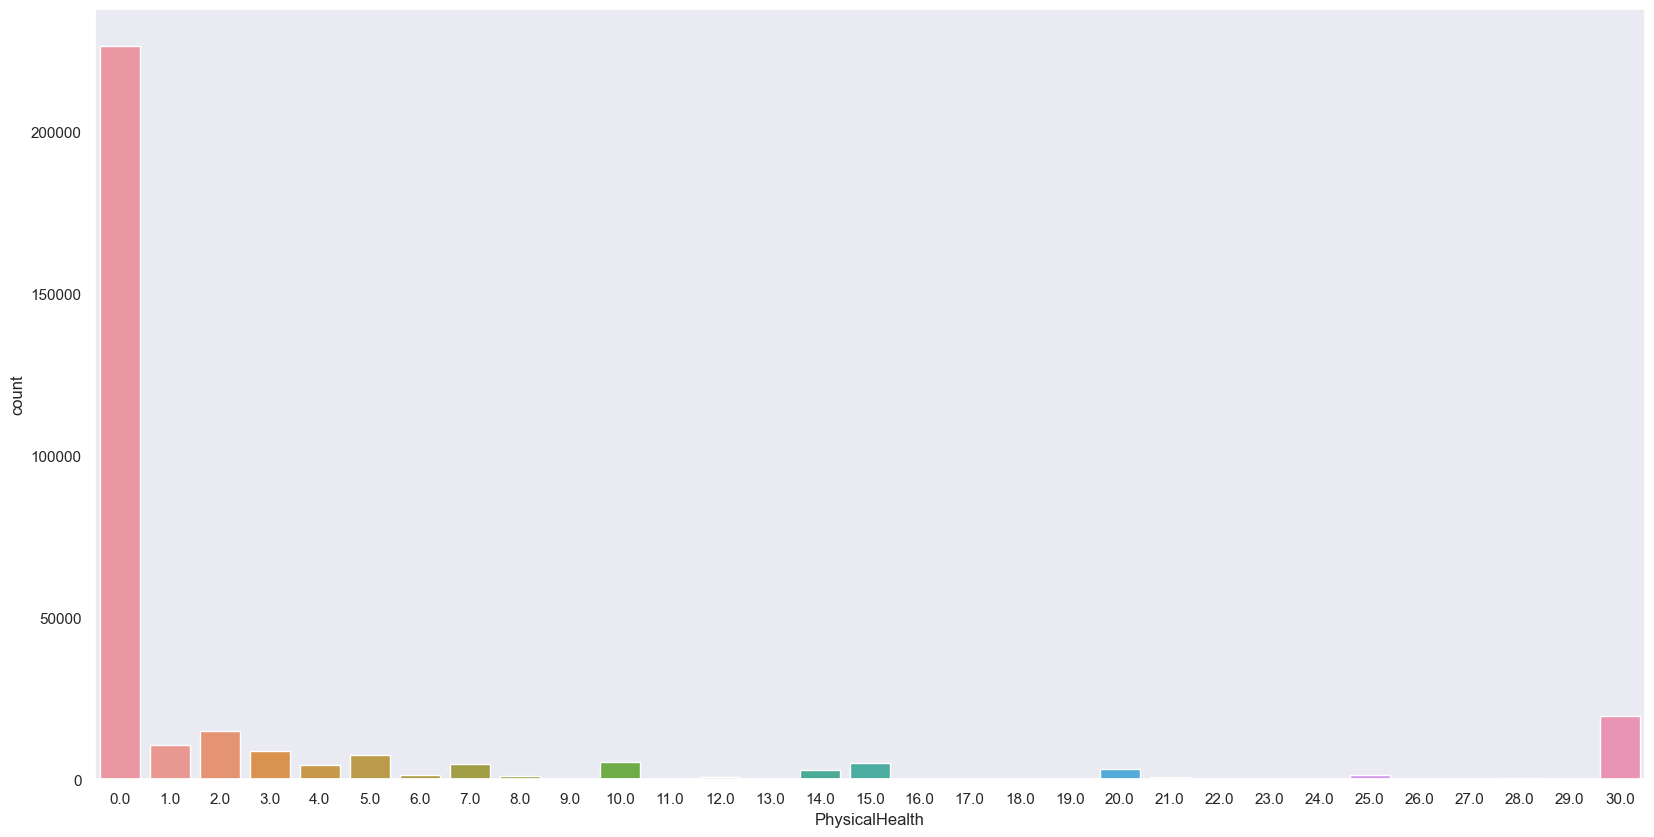

In [95]:
sns.countplot(data=df1,x='PhysicalHealth')

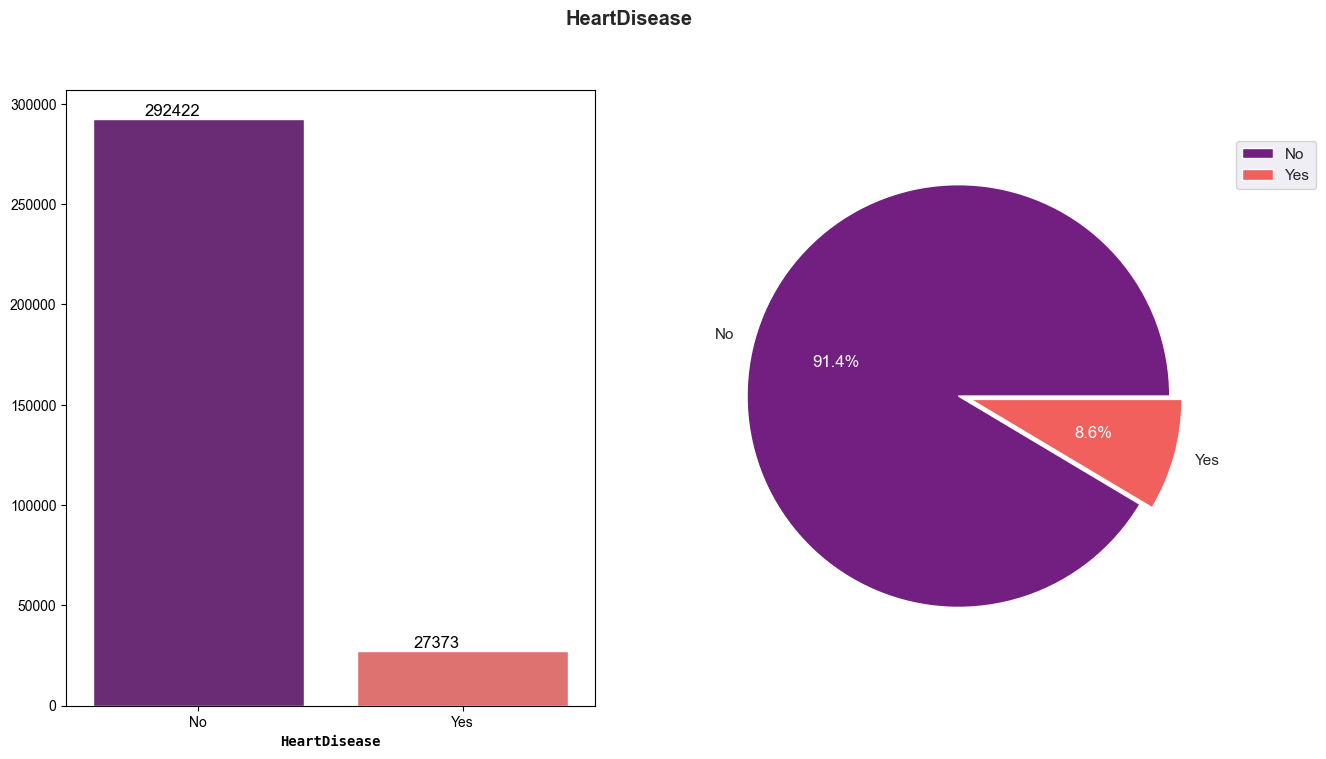

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['HeartDisease'].value_counts().index
y=df1['HeartDisease'].value_counts().values.tolist()
data = df1.groupby("HeartDisease").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('HeartDisease', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['HeartDisease'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('HeartDisease',weight = 'bold')
plt.show()

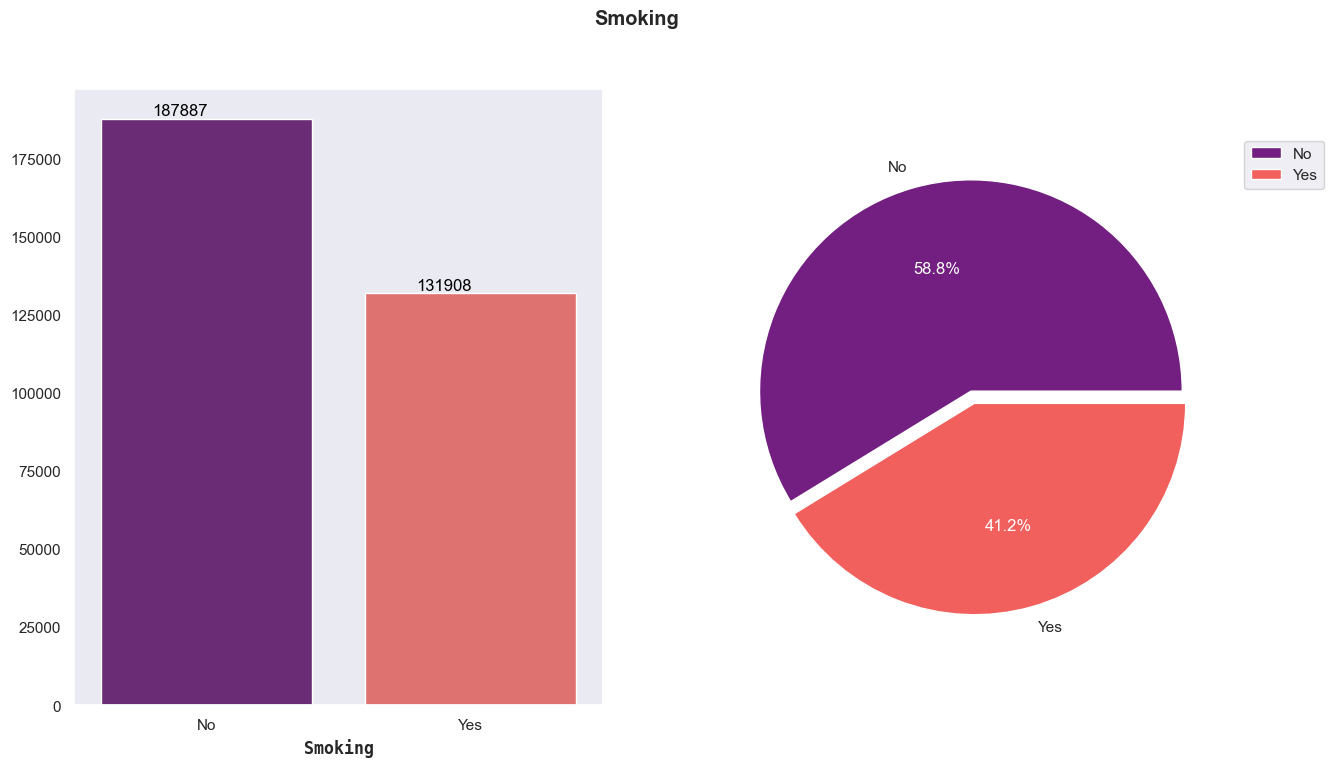

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['Smoking'].value_counts().index
y=df1['Smoking'].value_counts().values.tolist()
data = df1.groupby("Smoking").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Smoking', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['Smoking'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Smoking',weight = 'bold')
plt.show()

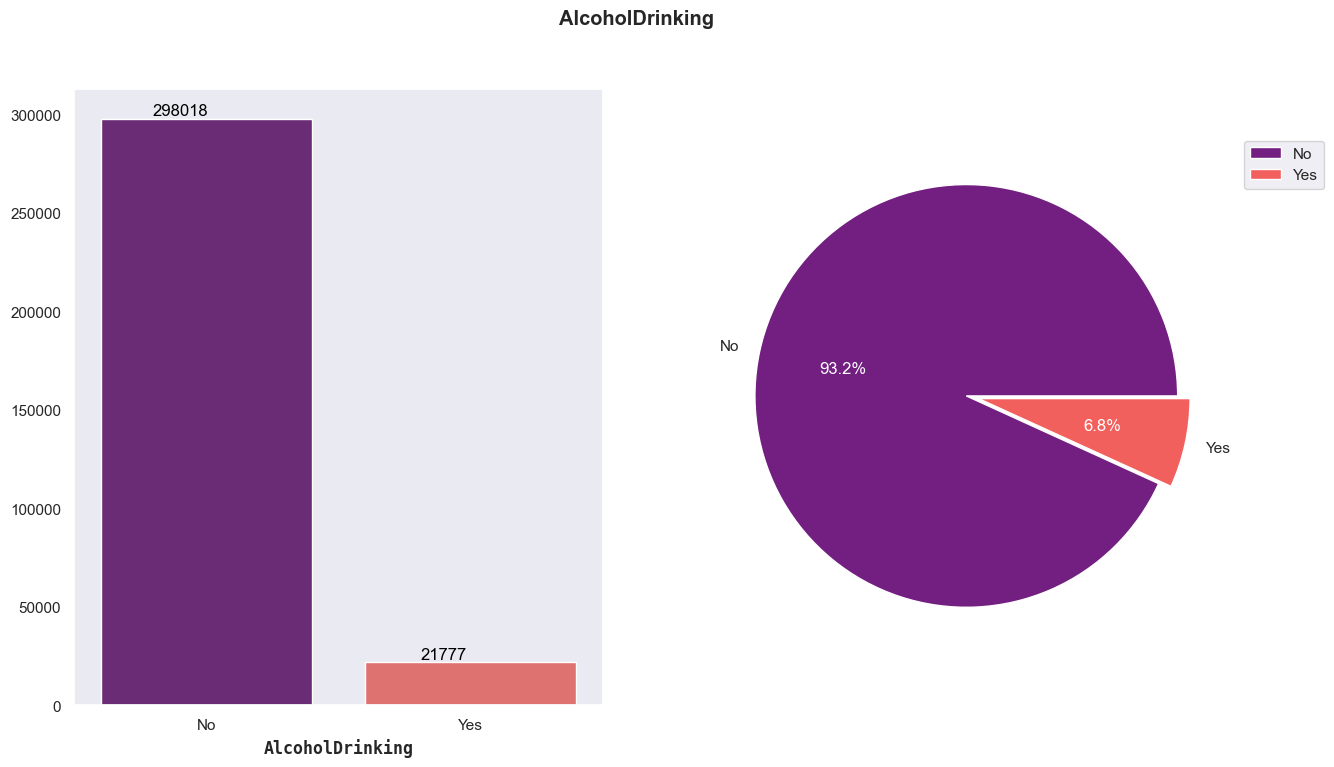

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['AlcoholDrinking'].value_counts().index
y=df1['AlcoholDrinking'].value_counts().values.tolist()
data = df1.groupby("AlcoholDrinking").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('AlcoholDrinking', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['AlcoholDrinking'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('AlcoholDrinking',weight = 'bold')
plt.show()

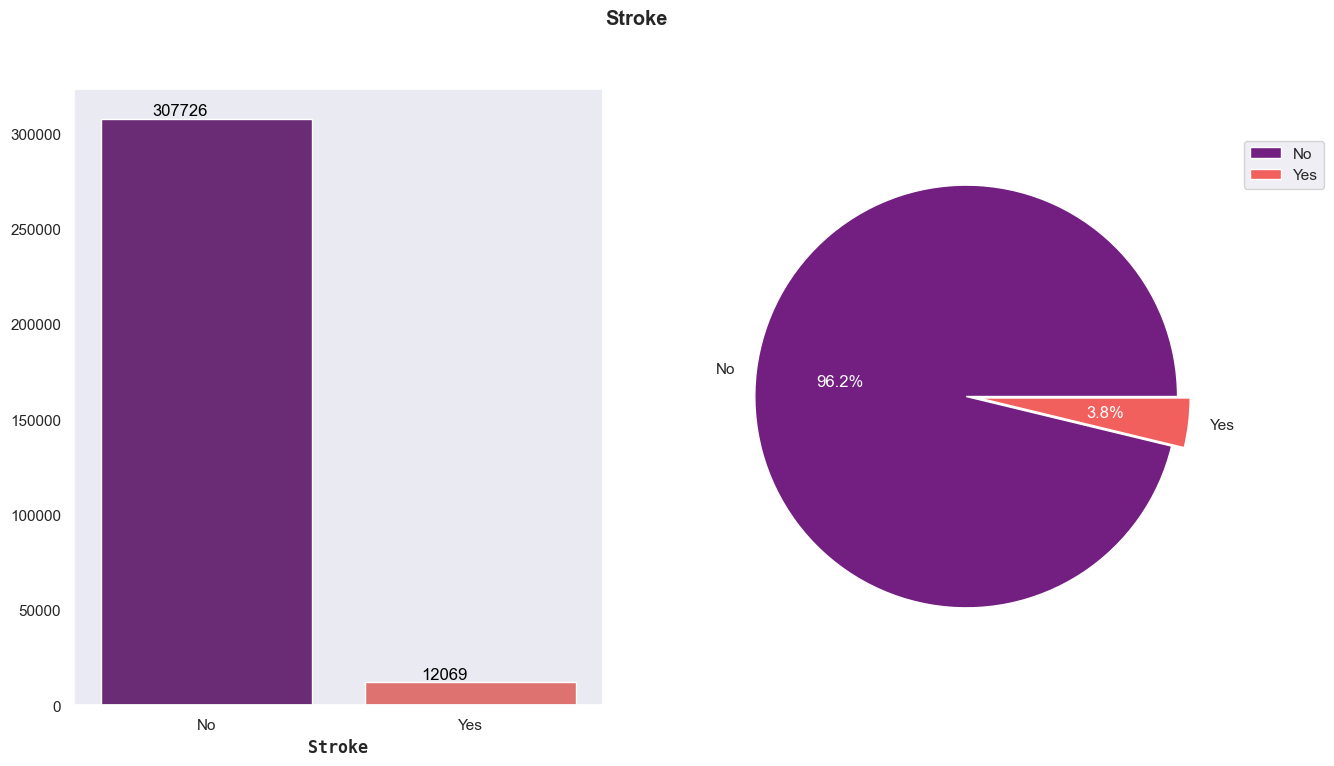

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['Stroke'].value_counts().index
y=df1['Stroke'].value_counts().values.tolist()
data = df1.groupby("Stroke").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Stroke', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['Stroke'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Stroke',weight = 'bold')
plt.show()

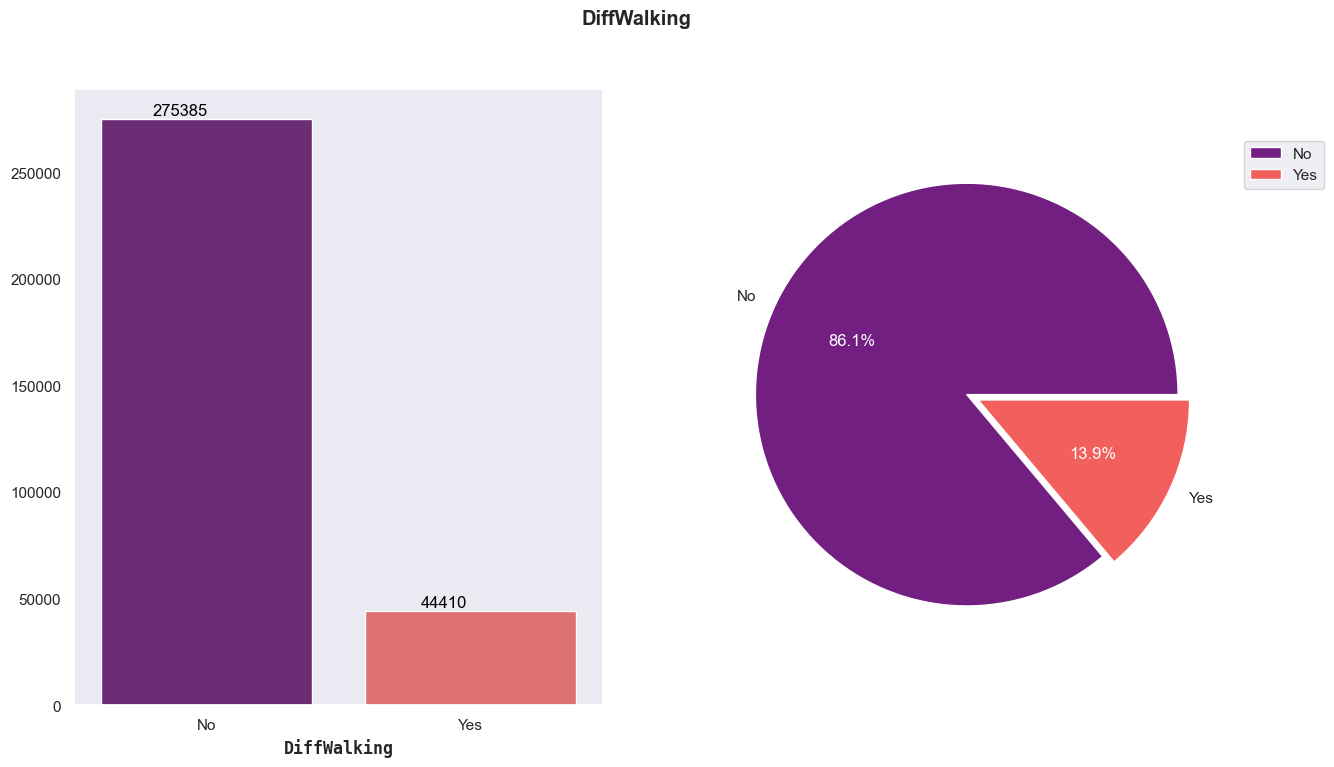

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['DiffWalking'].value_counts().index
y=df1['DiffWalking'].value_counts().values.tolist()
data = df1.groupby("DiffWalking").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('DiffWalking', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['DiffWalking'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('DiffWalking',weight = 'bold')
plt.show()

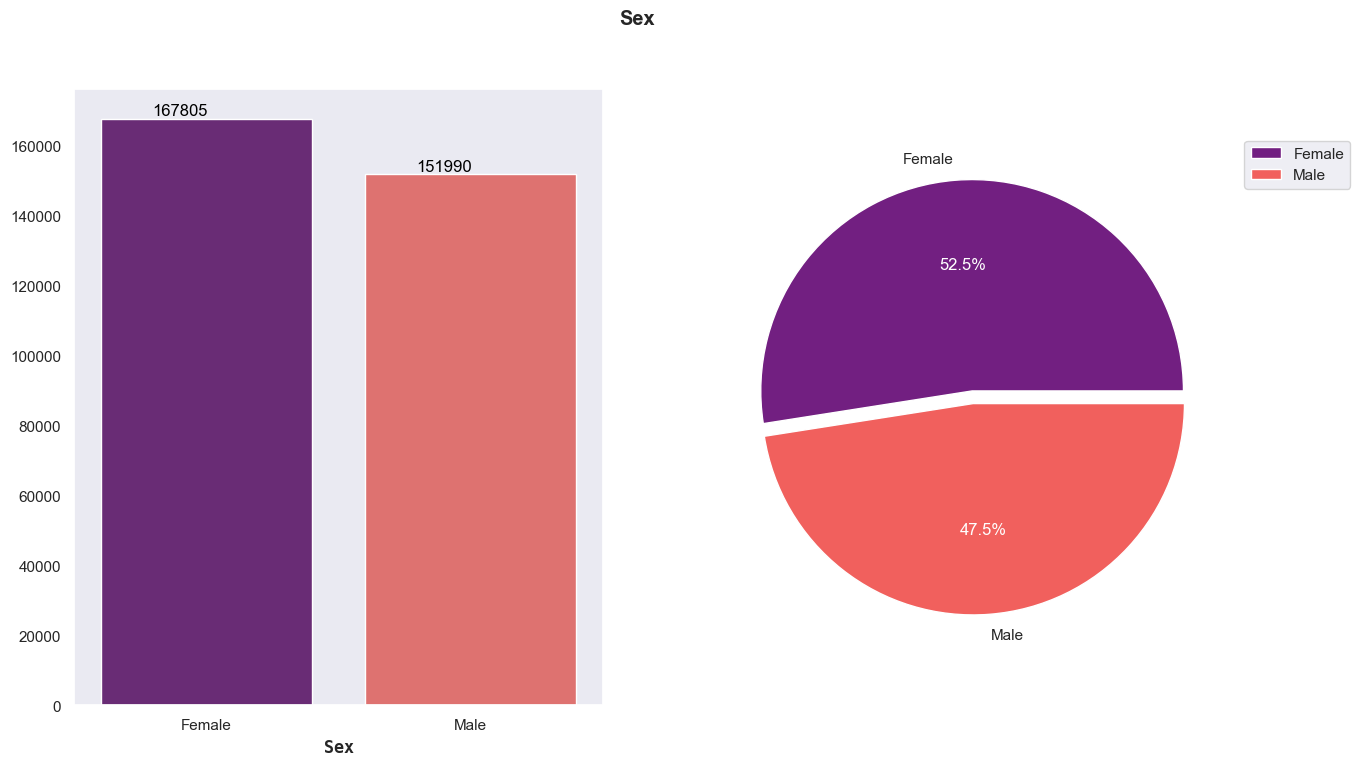

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['Sex'].value_counts().index
y=df1['Sex'].value_counts().values.tolist()
data = df1.groupby("Sex").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Sex', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['Sex'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Sex',weight = 'bold')
plt.show()

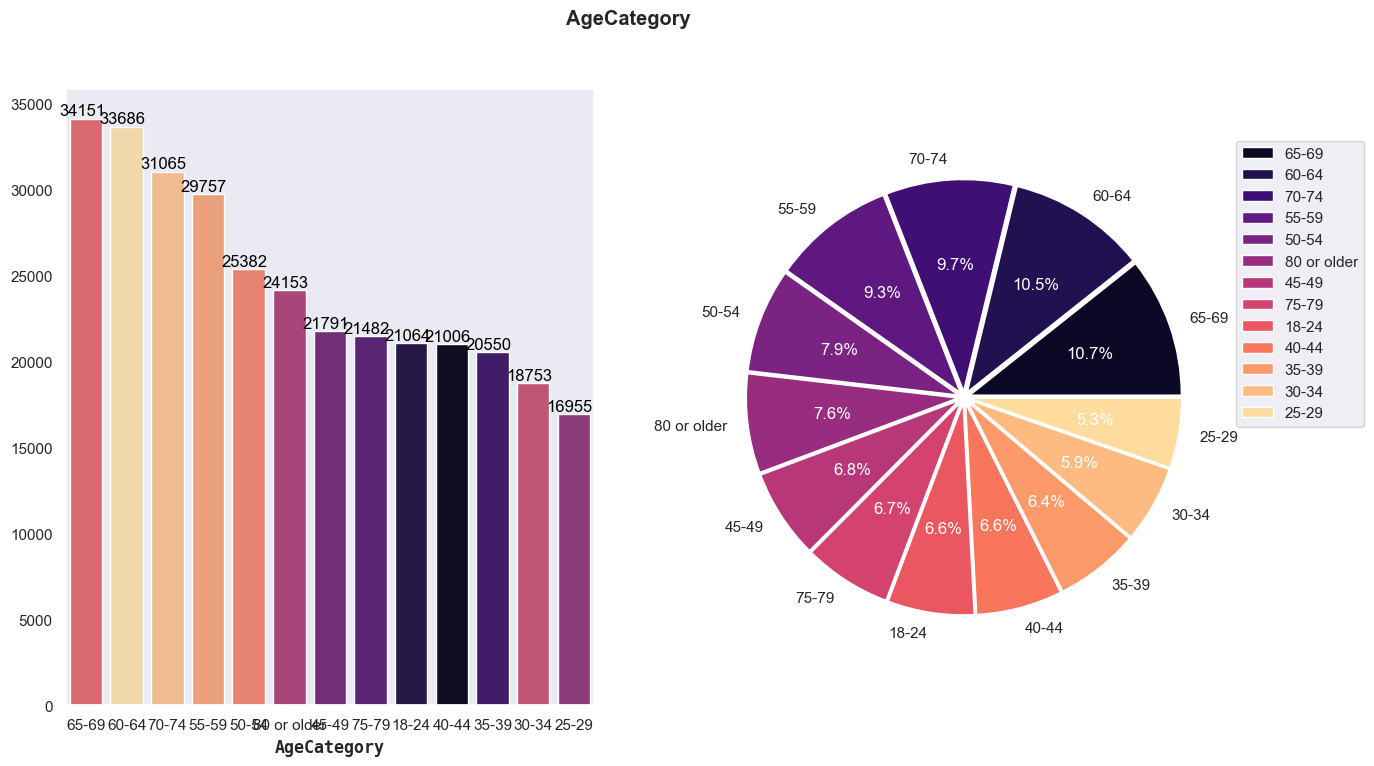

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['AgeCategory'].value_counts().index
y=df1['AgeCategory'].value_counts().values.tolist()
data = df1.groupby("AgeCategory").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('AgeCategory', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['AgeCategory'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('AgeCategory',weight = 'bold')
plt.show()

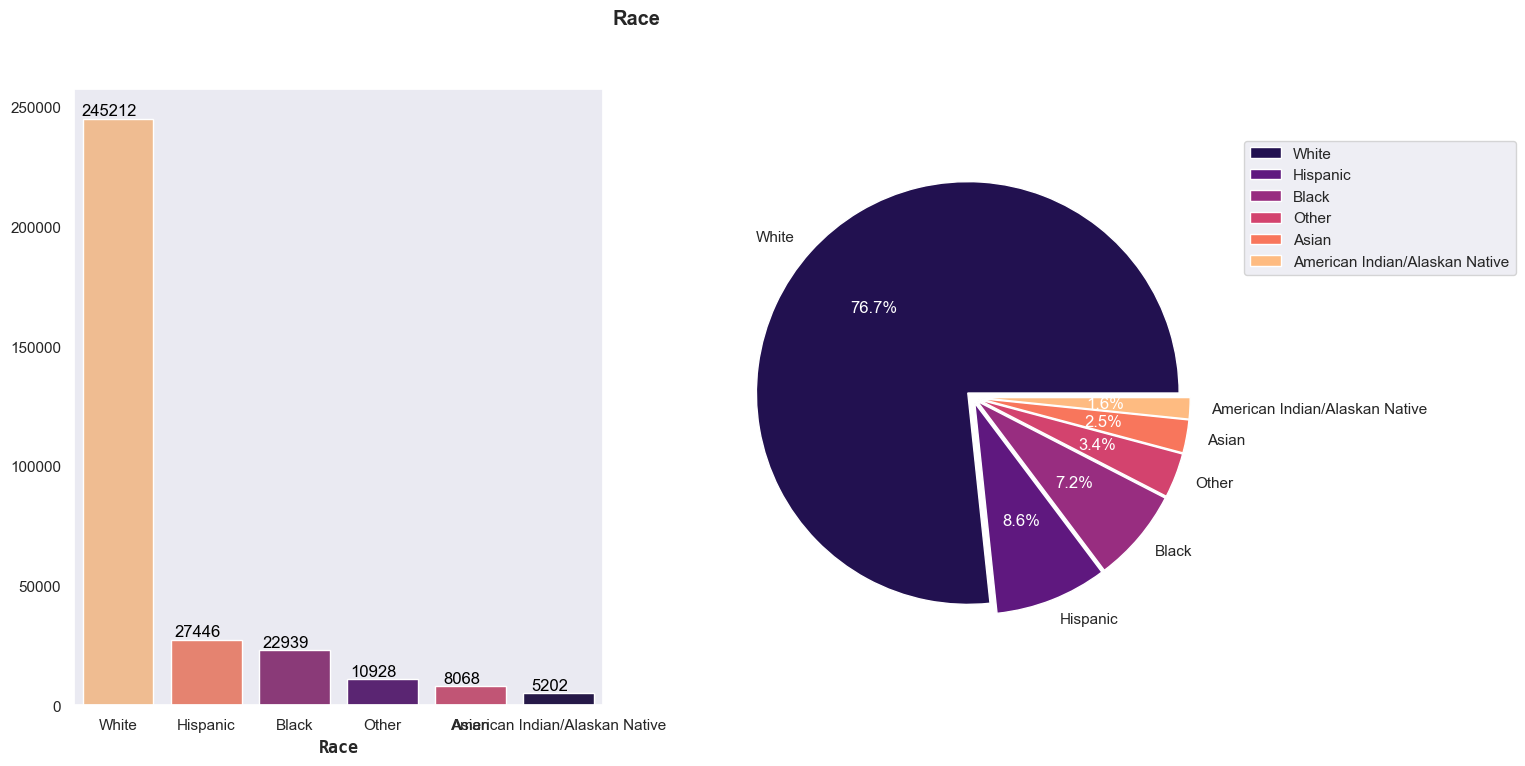

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['Race'].value_counts().index
y=df1['Race'].value_counts().values.tolist()
data = df1.groupby("Race").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Race', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['Race'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Race',weight = 'bold')
plt.show()

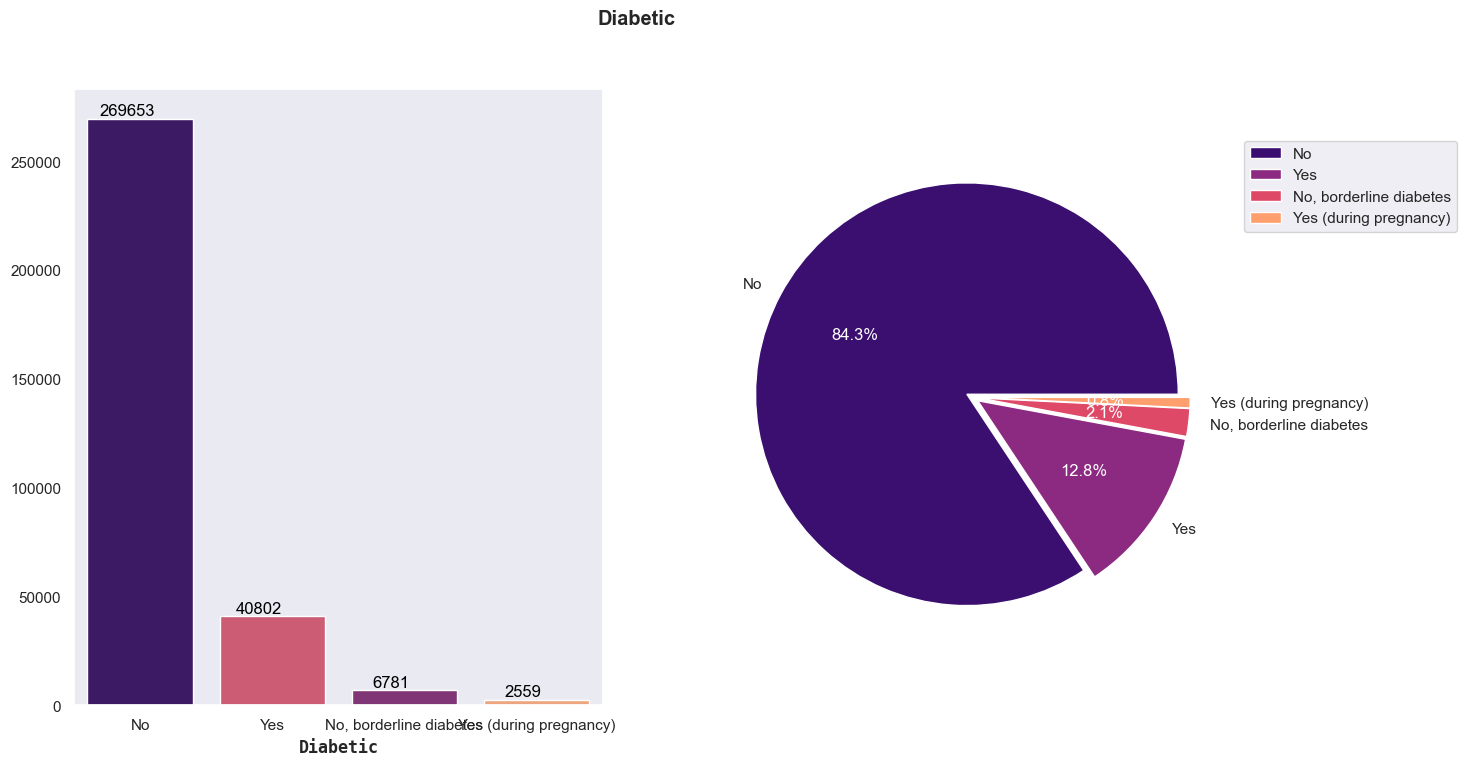

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['Diabetic'].value_counts().index
y=df1['Diabetic'].value_counts().values.tolist()
data = df1.groupby("Diabetic").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Diabetic', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['Diabetic'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Diabetic',weight = 'bold')
plt.show()

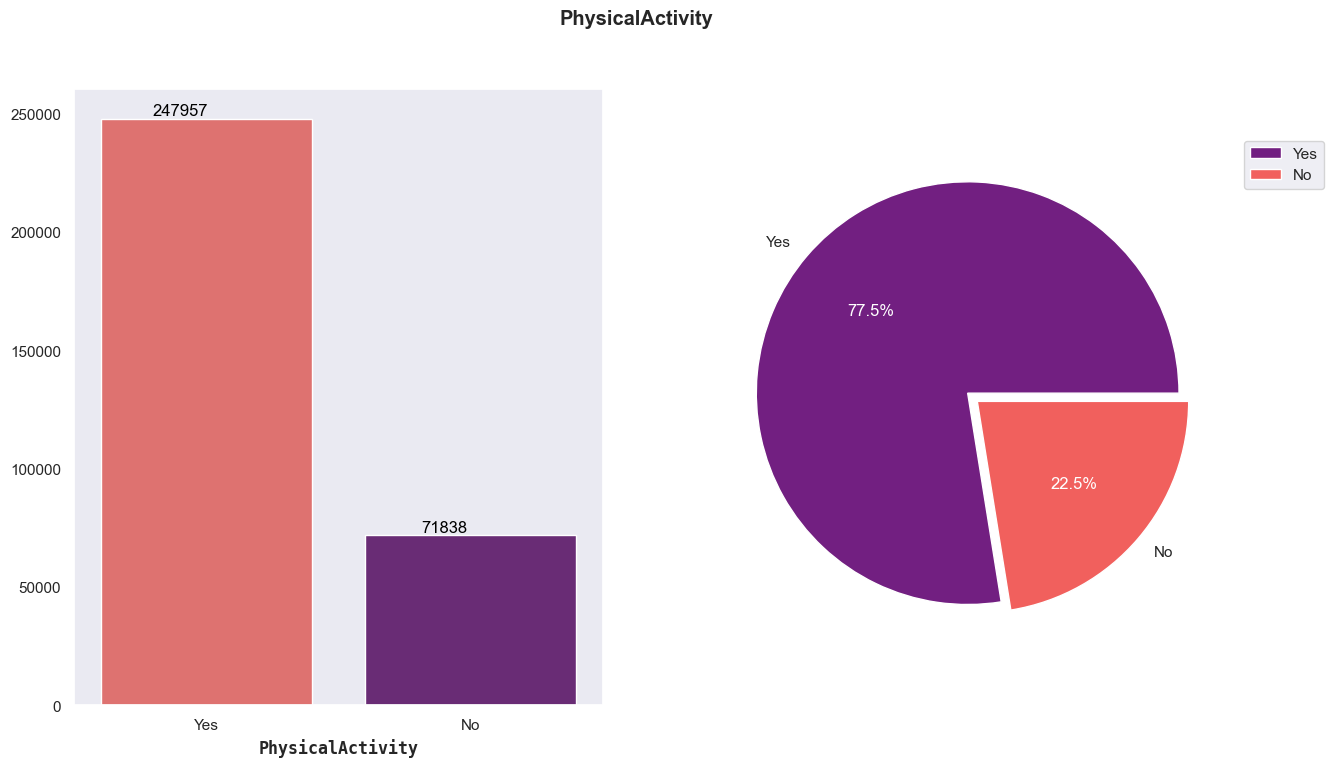

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['PhysicalActivity'].value_counts().index
y=df1['PhysicalActivity'].value_counts().values.tolist()
data = df1.groupby("PhysicalActivity").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('PhysicalActivity', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['PhysicalActivity'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('PhysicalActivity',weight = 'bold')
plt.show()

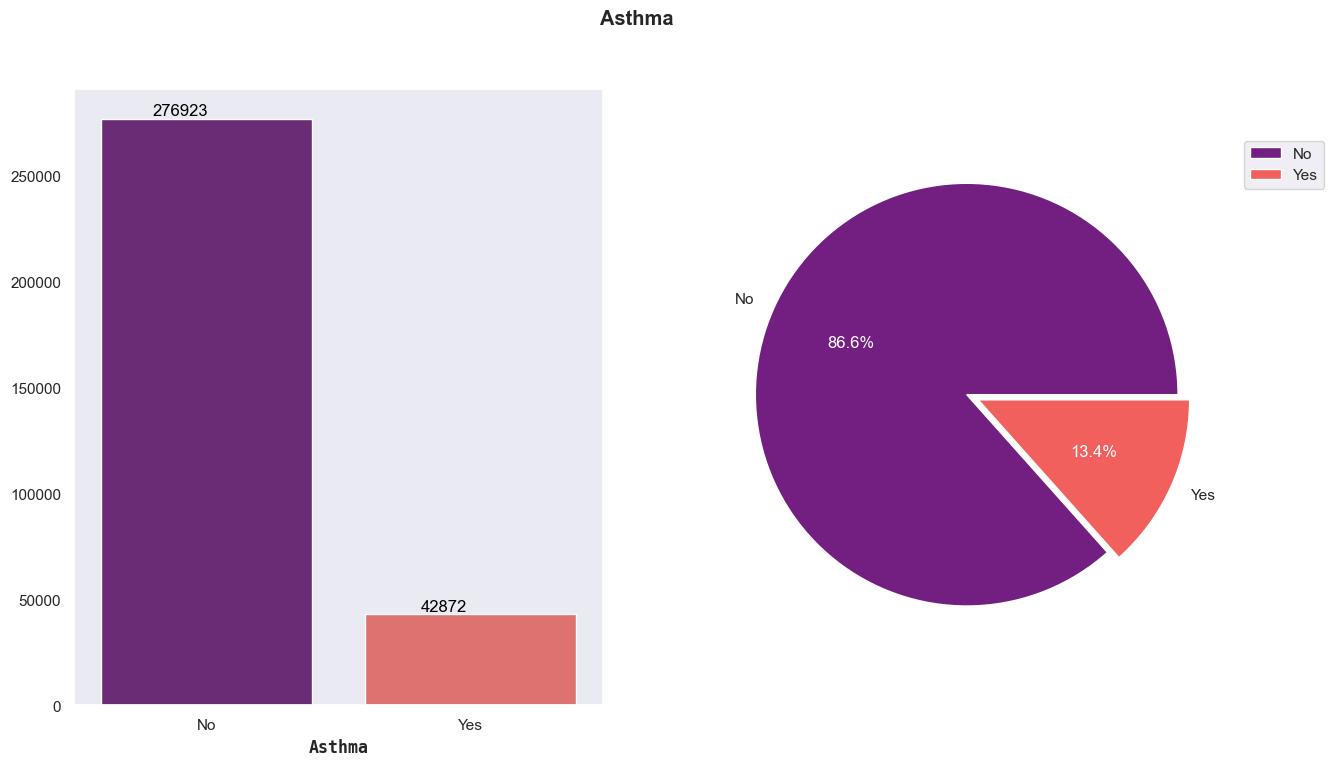

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['Asthma'].value_counts().index
y=df1['Asthma'].value_counts().values.tolist()
data = df1.groupby("Asthma").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Asthma', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['Asthma'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Asthma',weight = 'bold')
plt.show()

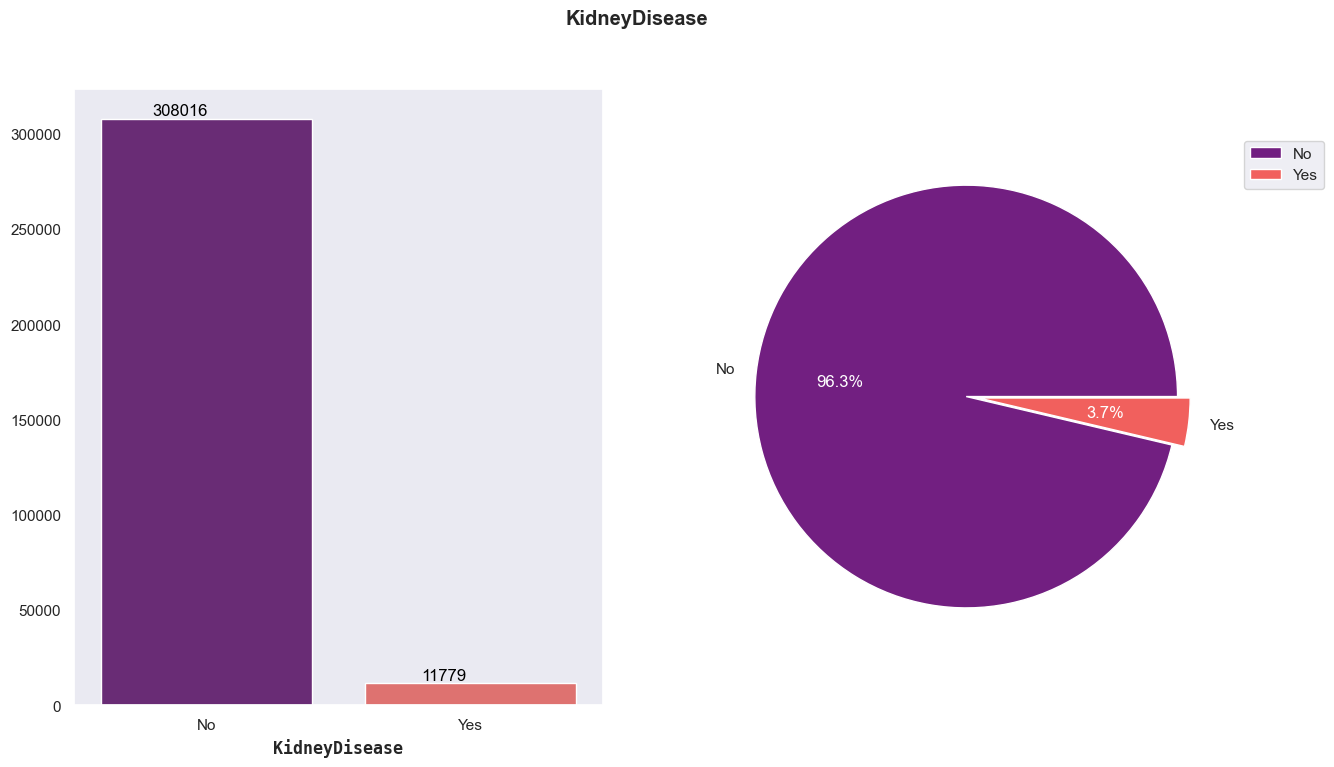

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['KidneyDisease'].value_counts().index
y=df1['KidneyDisease'].value_counts().values.tolist()
data = df1.groupby("KidneyDisease").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('KidneyDisease', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['KidneyDisease'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('KidneyDisease',weight = 'bold')
plt.show()

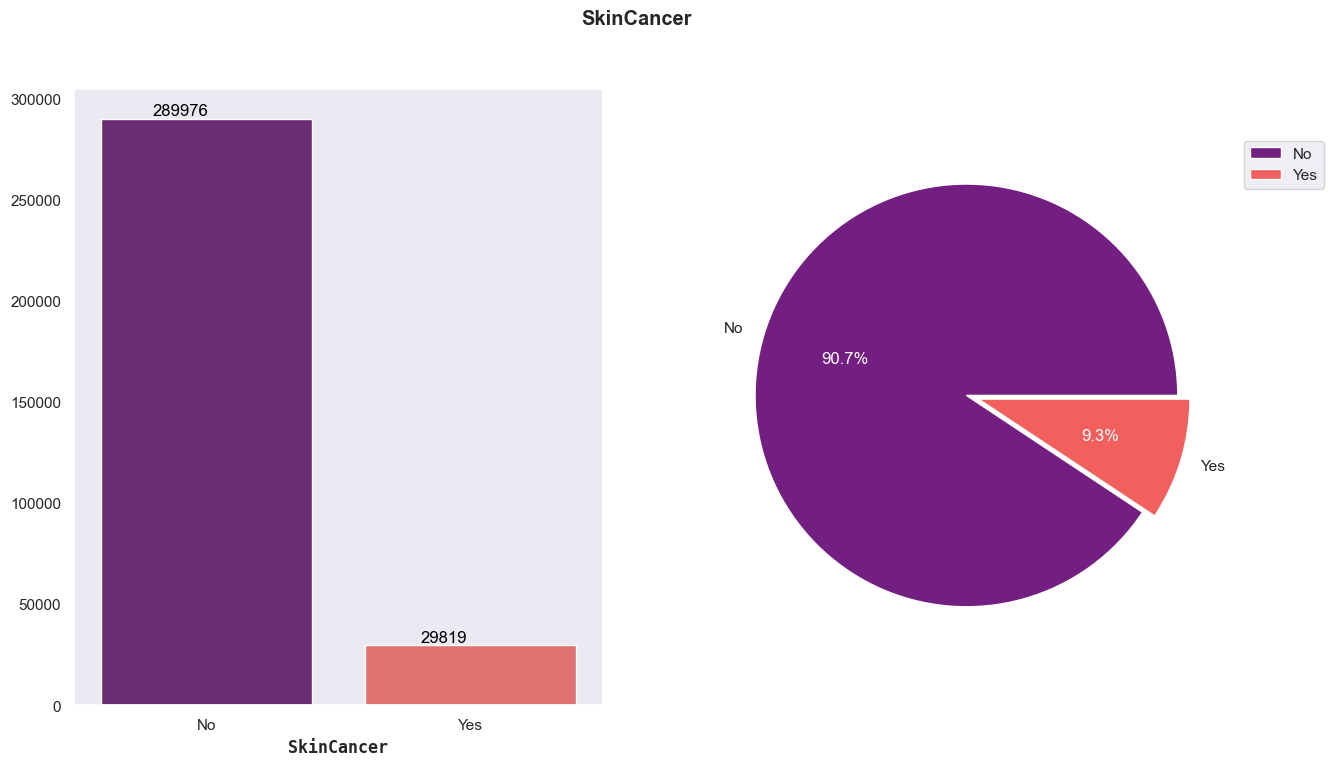

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['SkinCancer'].value_counts().index
y=df1['SkinCancer'].value_counts().values.tolist()
data = df1.groupby("SkinCancer").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('SkinCancer', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['SkinCancer'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('SkinCancer',weight = 'bold')
plt.show()

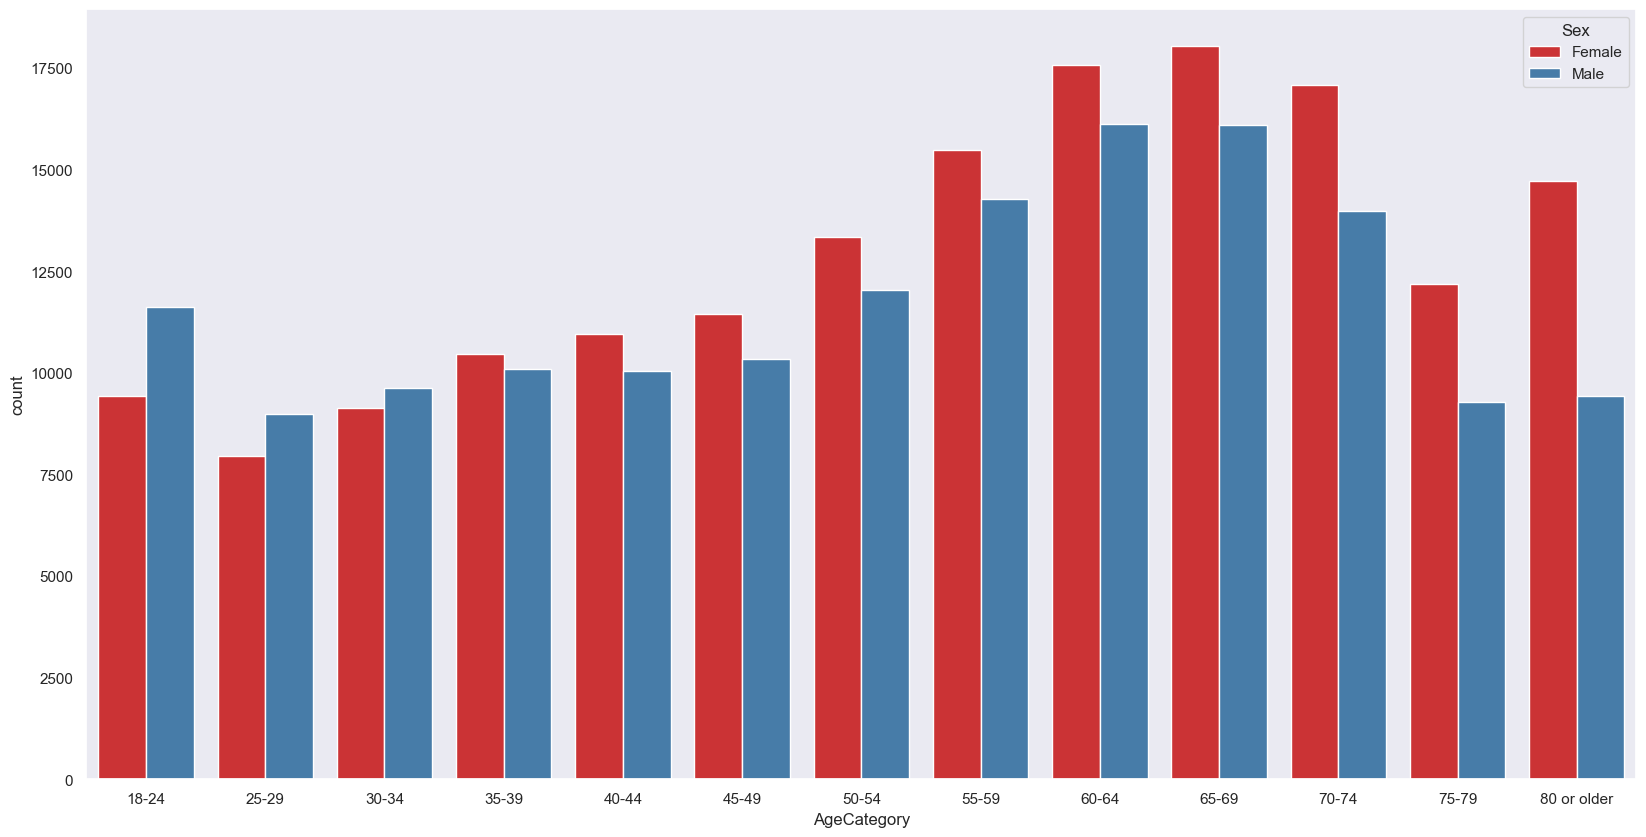

In [22]:
ageCategorySort =['18-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79', '80 or older']
plt.rcParams["figure.figsize"]=[20,10]
sns.countplot(x="AgeCategory", hue="Sex", data=df1, palette="Set1", order = ageCategorySort)
plt.draw()

In [23]:
# get start:

In [24]:
df1.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [25]:
df2=df1.copy()

We choose numbers above 1 so that when we increase its weight, the model notices the change. If the numbers are 0 and 1, when they reach the power, they will not change anything

In [26]:
# Yes = 3
# No = 2

df2['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)
df2['Smoking'].replace({'Yes':3,'No':2},inplace=True)
df2['AlcoholDrinking'].replace({'Yes':3,'No':2},inplace=True)
df2['Stroke'].replace({'Yes':3,'No':2},inplace=True)
df2['DiffWalking'].replace({'Yes':3,'No':2},inplace=True)
df2['Sex'].replace({'Male':3,'Female':2},inplace=True)
df2['Diabetic'].replace({'Yes':3,'No':2,'No, borderline diabetes':4,'Yes (during pregnancy)':5},inplace=True)
df2['PhysicalActivity'].replace({'Yes':3,'No':2},inplace=True)
df2['Asthma'].replace({'Yes':3,'No':2},inplace=True)
df2['KidneyDisease'].replace({'Yes':3,'No':2},inplace=True)
df2['SkinCancer'].replace({'Yes':3,'No':2},inplace=True)
df2['AgeCategory'].replace({'18-24':2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7,'50-54':8,'55-59':9,'60-64':10,'65-69':11,'70-74':12,'75-79':13,'80 or older':14},inplace=True)
df2['Race'].replace({'White':2,'Black':3,'Asian':4,'American Indian/Alaskan Native':5,'Other':6,'Hispanic':7},inplace=True)
df2['GenHealth'].replace({'Very good':2,'Fair':3,'Good':4,'Poor':5,'Excellent':6},inplace=True)


In [27]:
df2.head(3)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        3                2       2             3.0   
1             0  20.34        2                2       3             0.0   
2             0  26.58        3                2       2            20.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            2    2            9     2         3   
1           0.0            2    2           14     2         2   
2          30.0            2    3           11     2         3   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 3          2        5.0       3              2           3  
1                 3          2        7.0       2              2           2  
2                 3          3        8.0       3              2           2

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

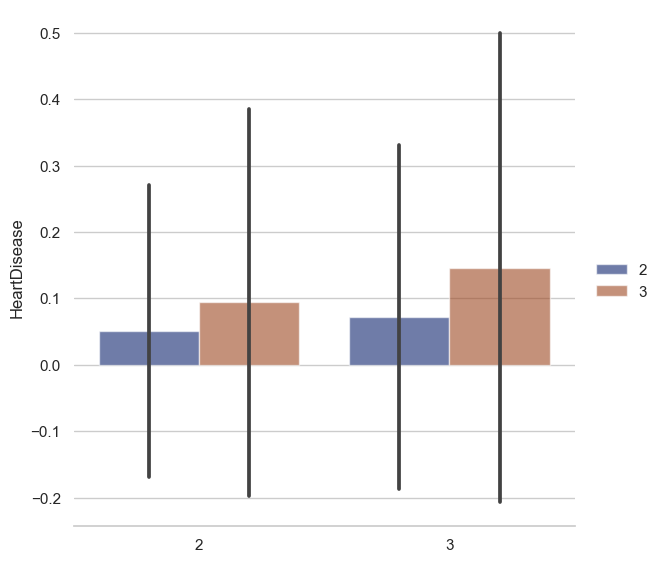

In [29]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df2, kind="bar",
    x="Sex", y="HeartDisease", hue="Smoking",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "HeartDisease")
g.legend.set_title("")

# sex 2 = Female and 3 = Male
# Smoking 2=No and 3=Yes

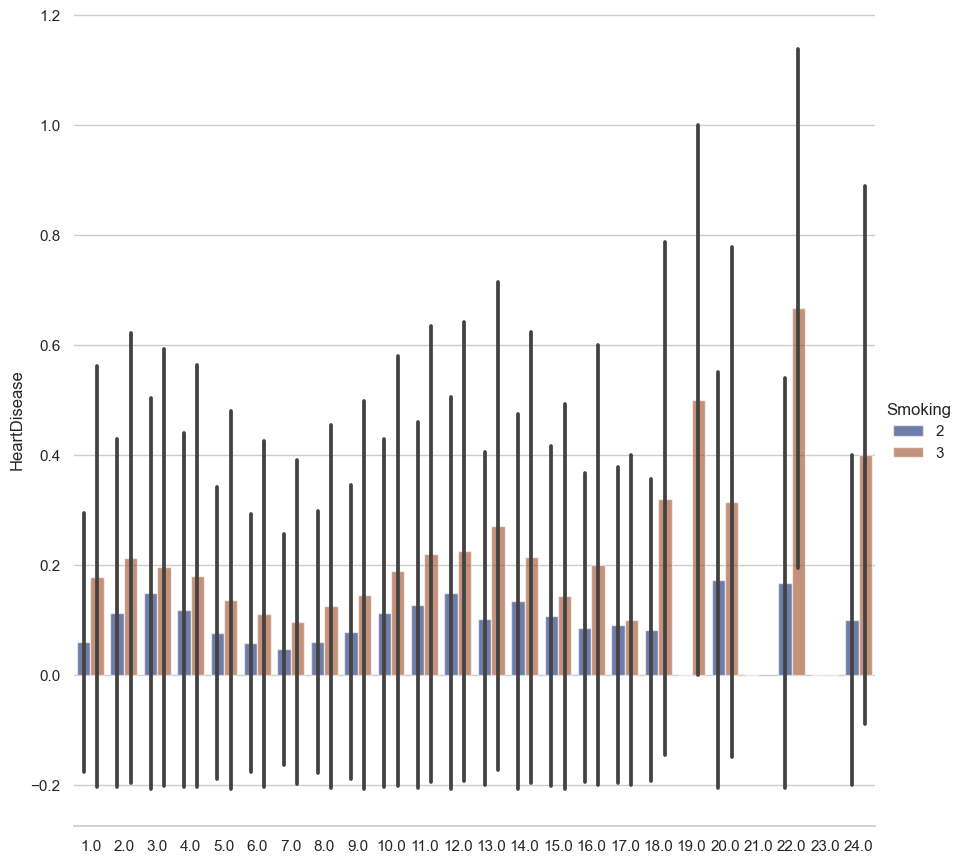

In [30]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df2, kind="bar",
    x="SleepTime", y="HeartDisease", hue="Smoking",
    ci="sd", palette="dark", alpha=.6, height=9
)
g.despine(left=True)
g.set_axis_labels("", "HeartDisease")
g.legend.set_title("Smoking")

In [31]:
pdp.ProfileReport(df2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

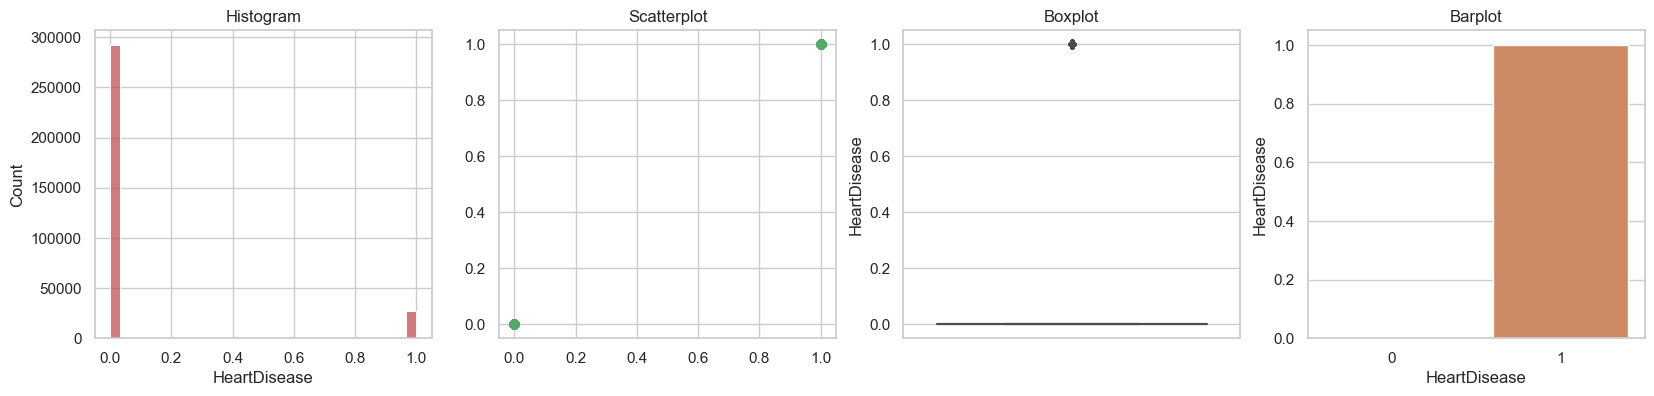

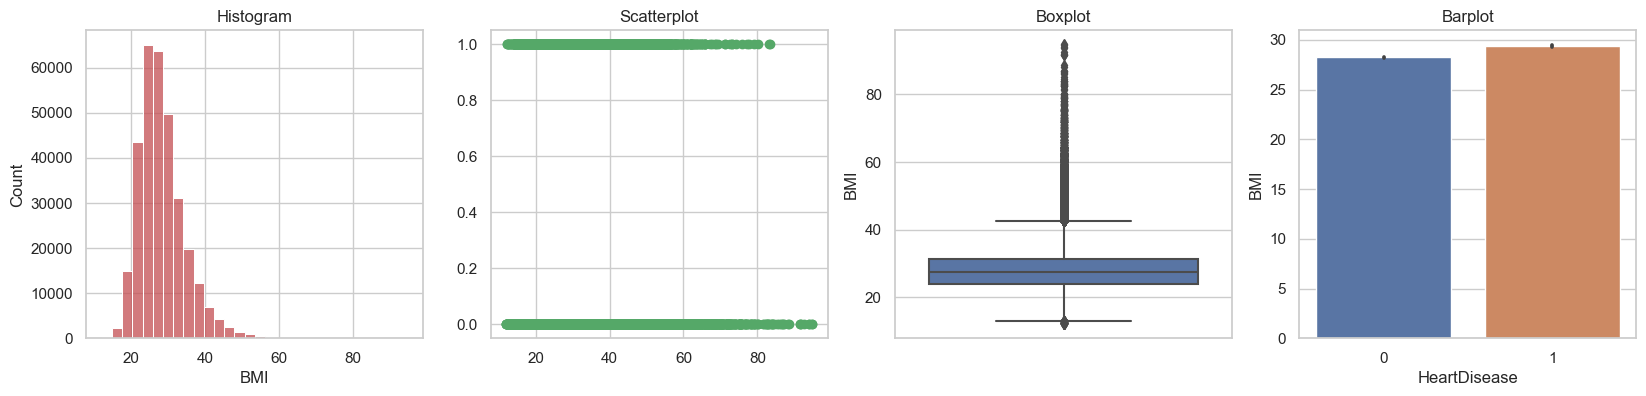

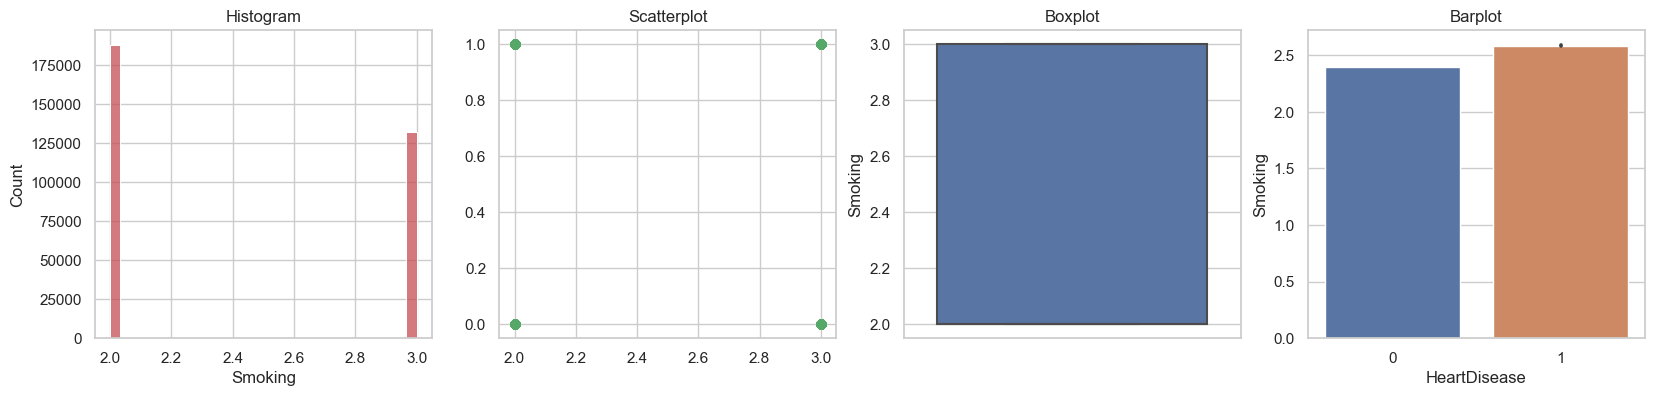

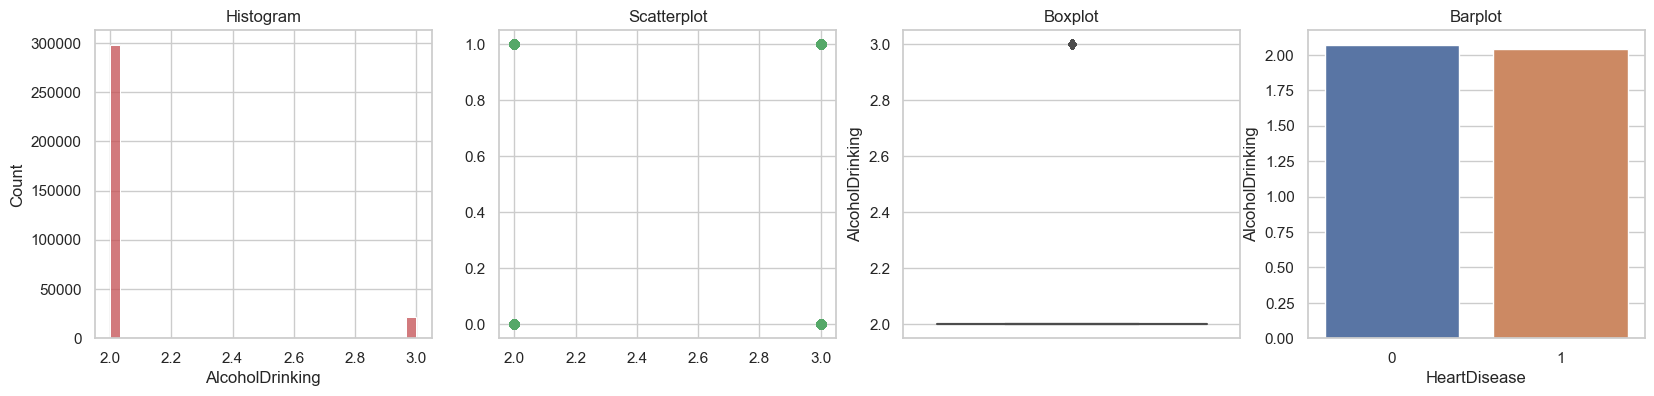

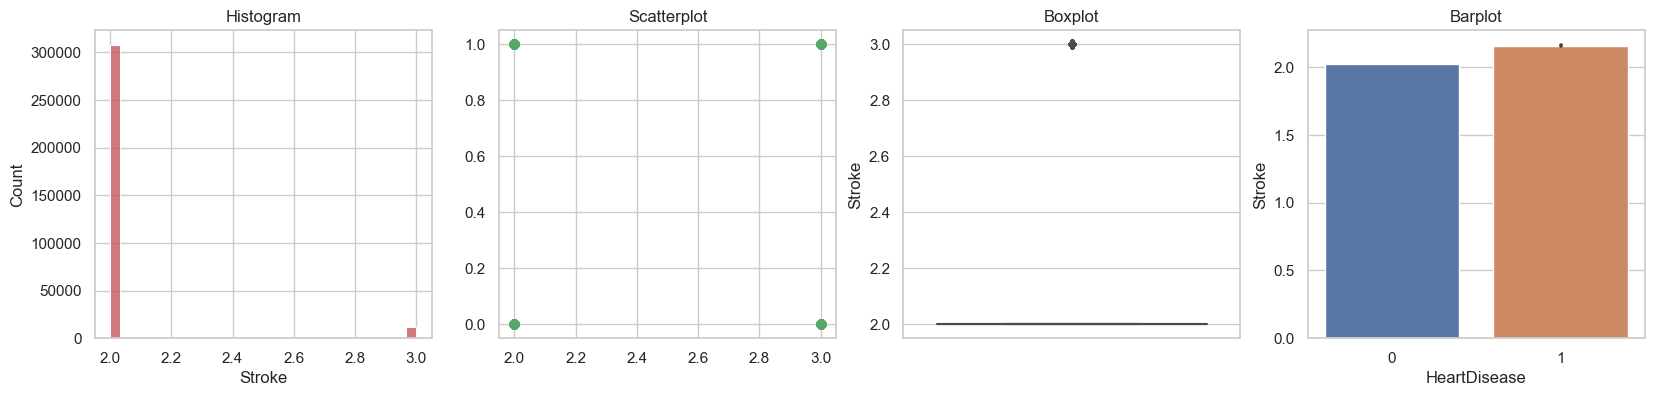

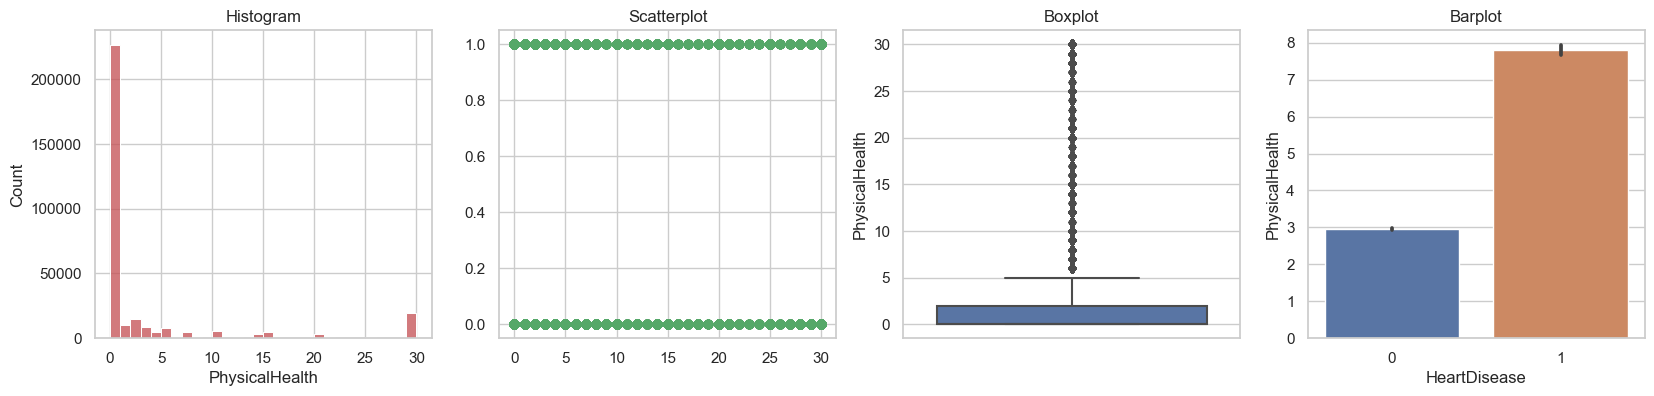

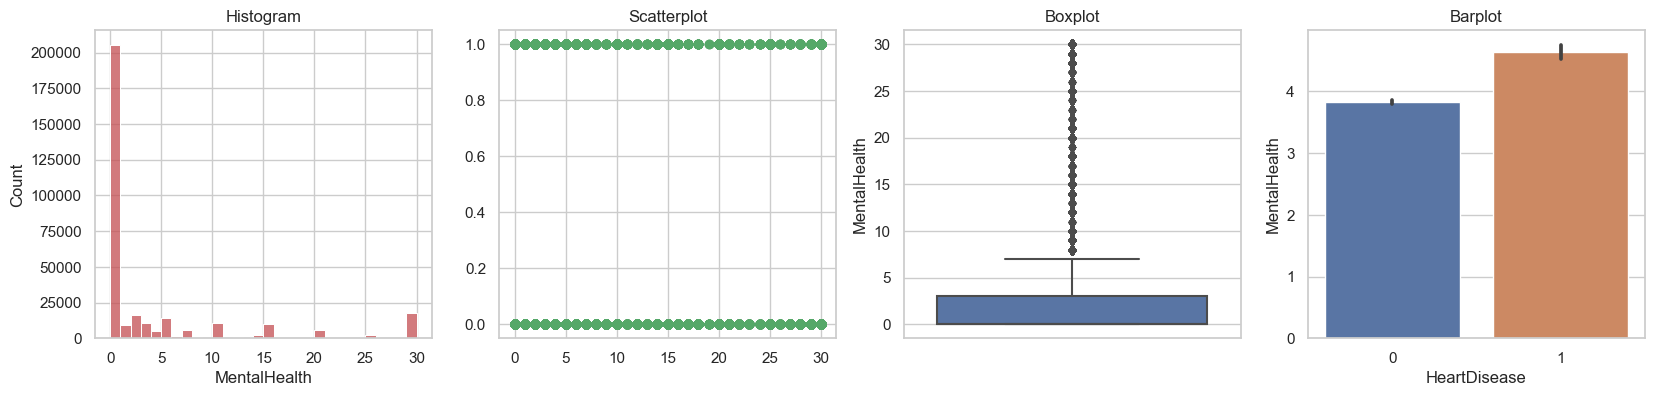

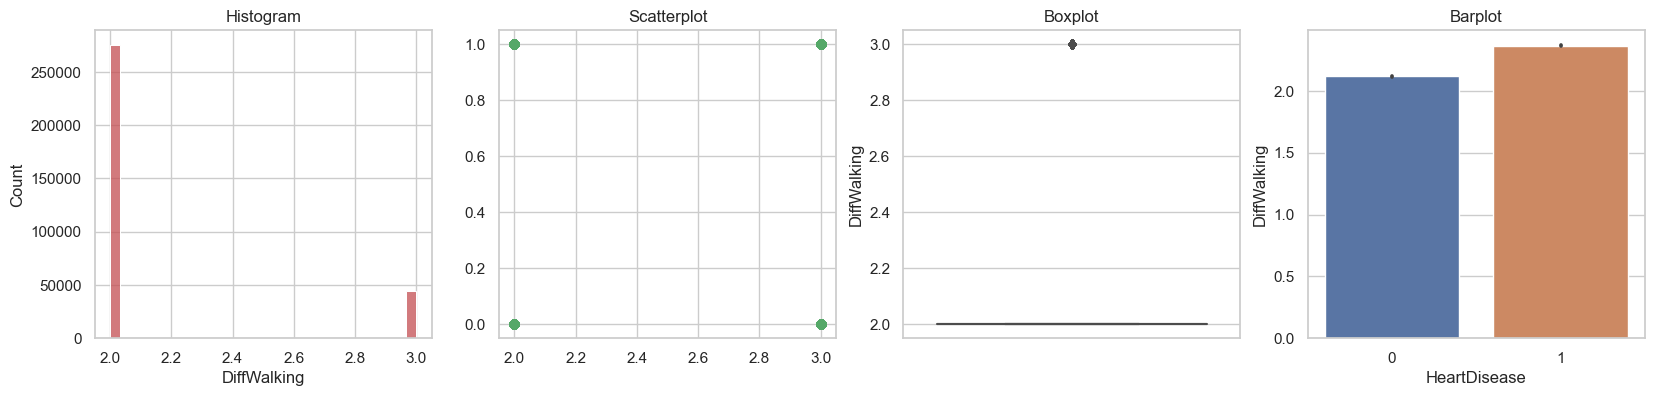

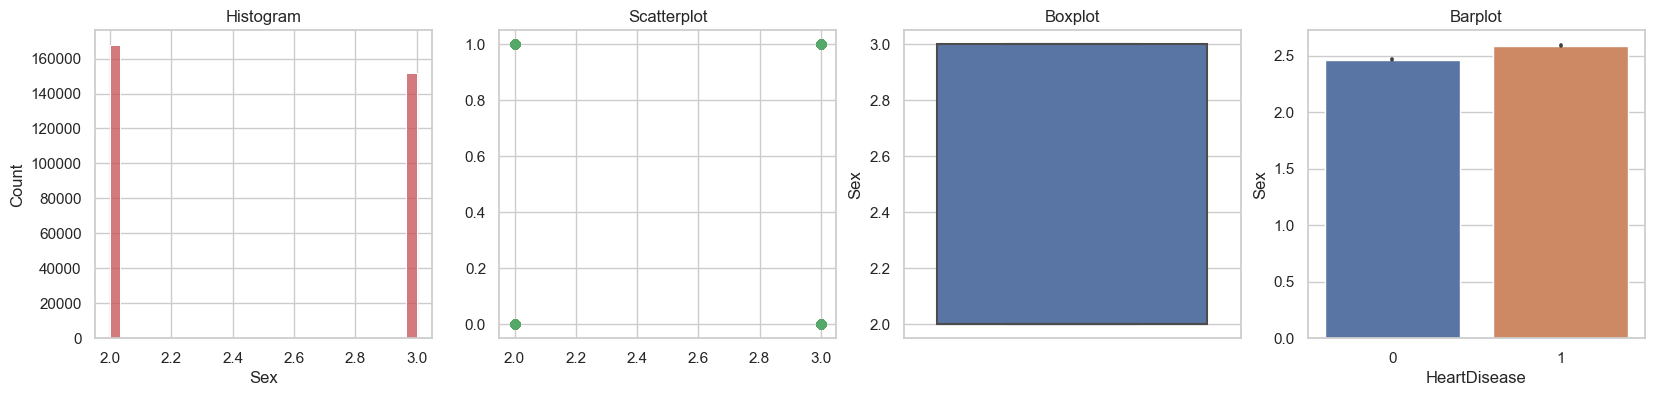

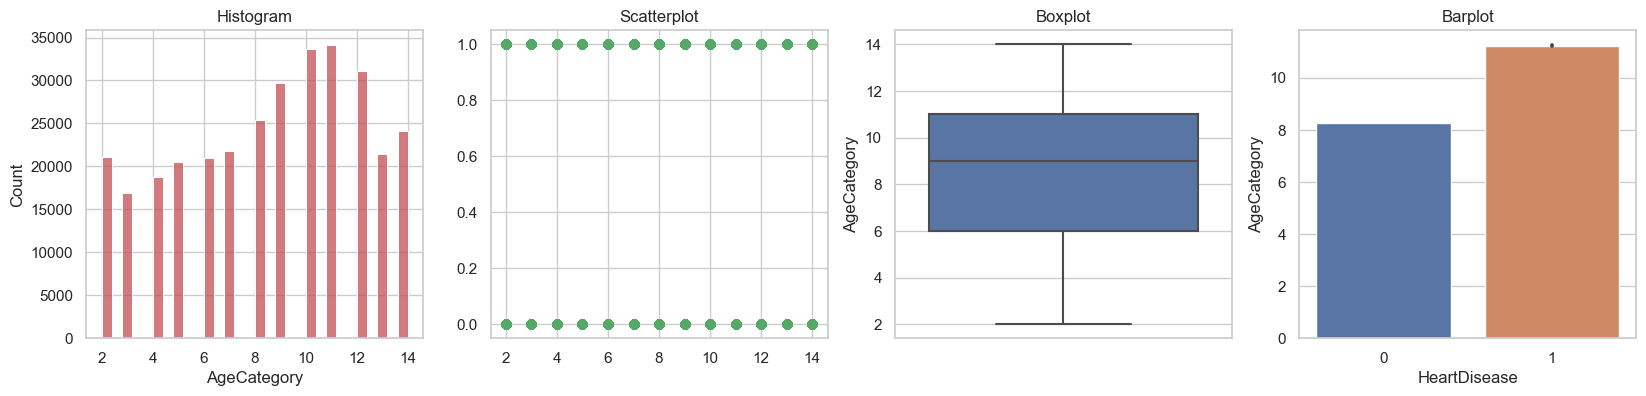

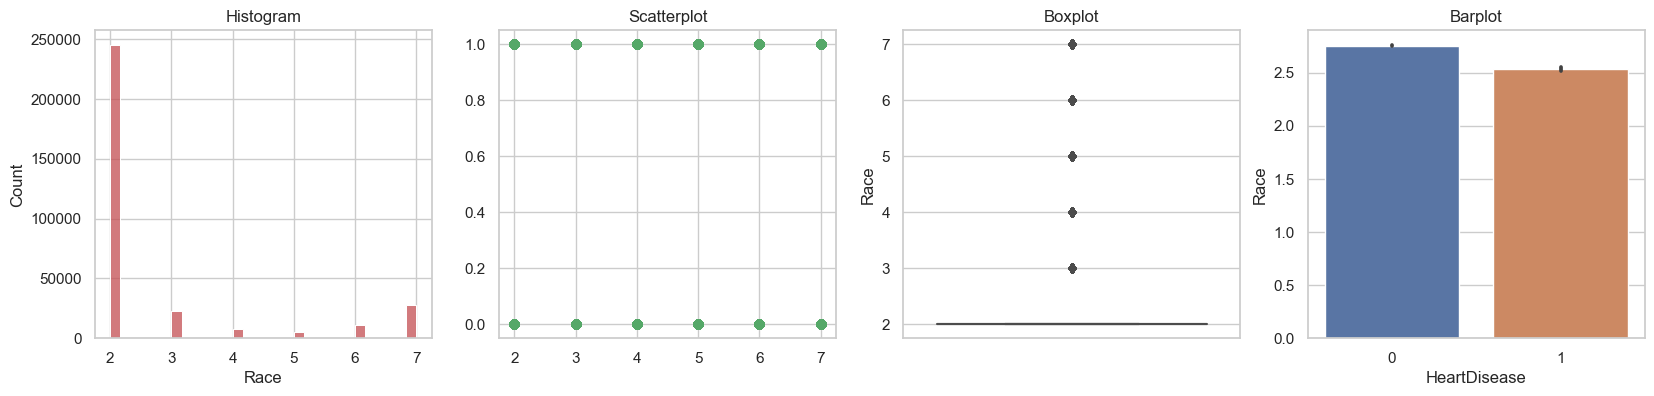

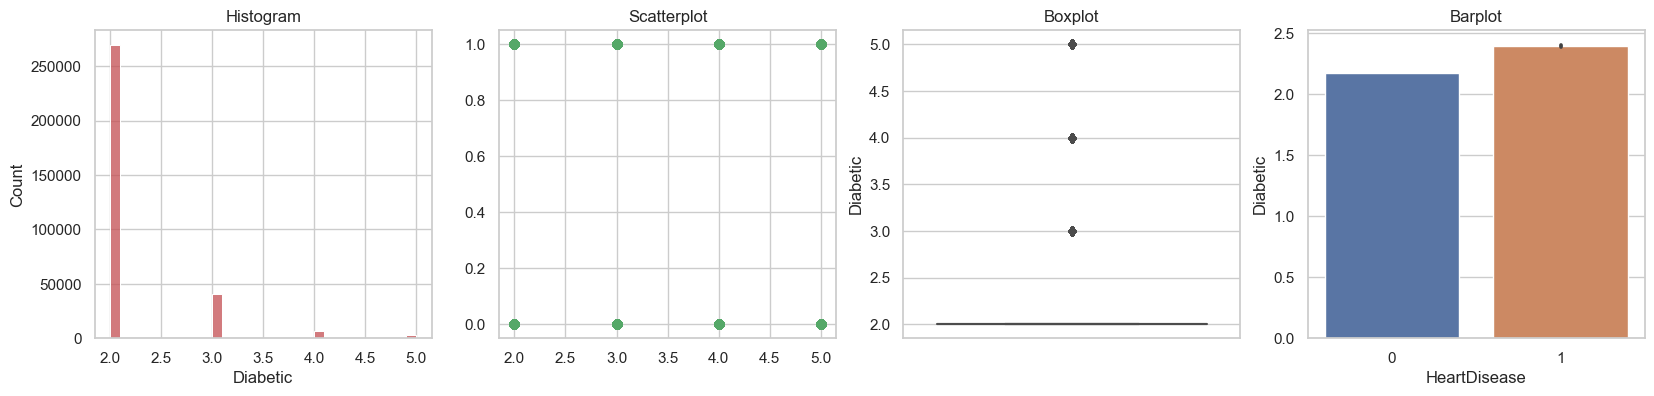

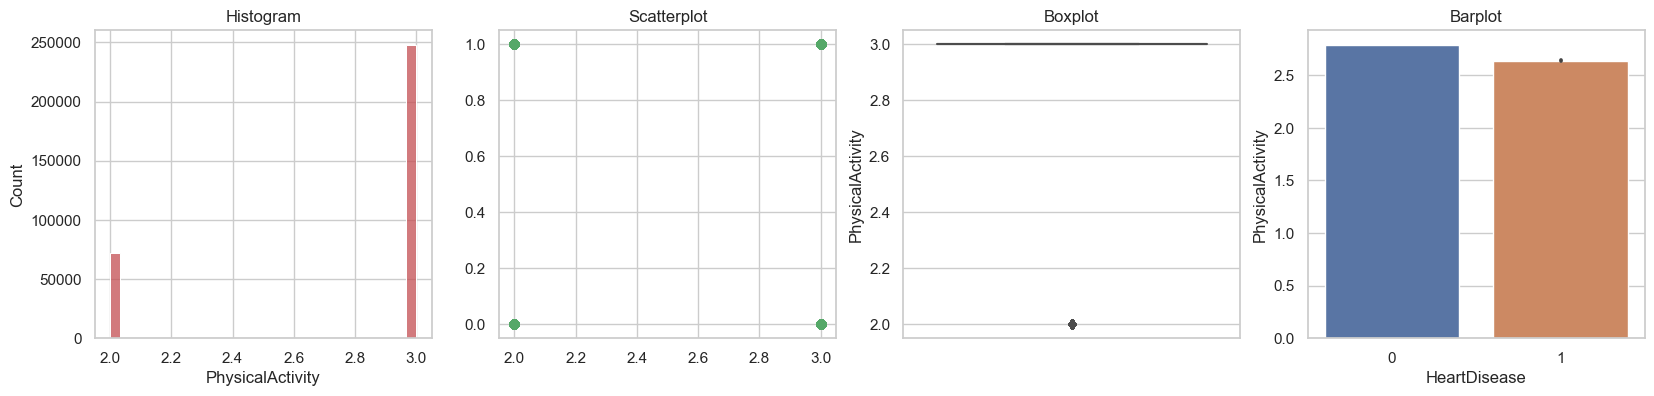

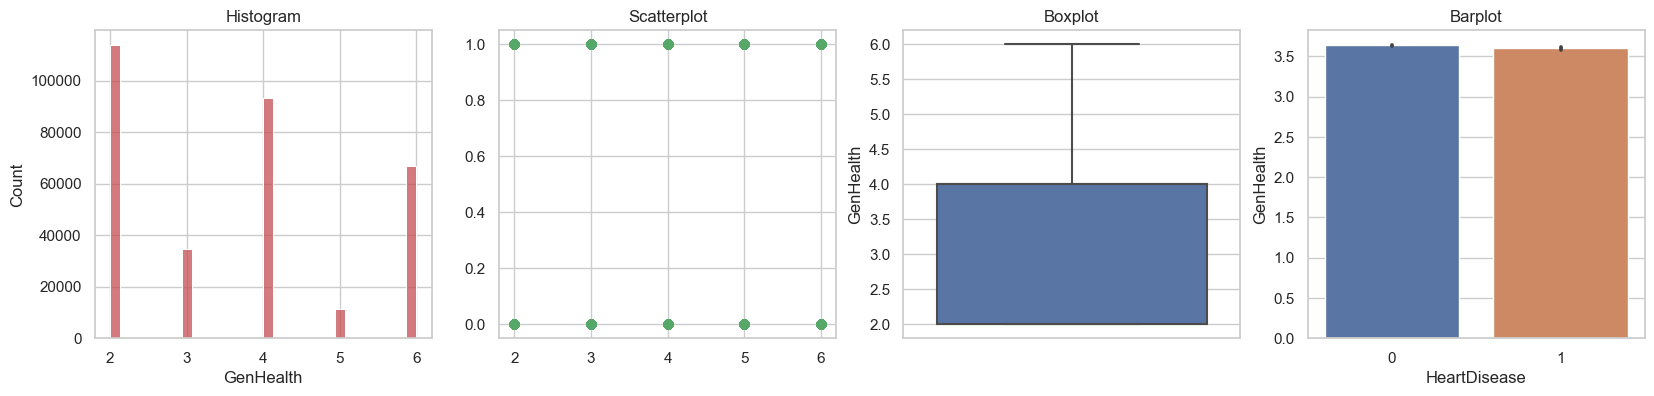

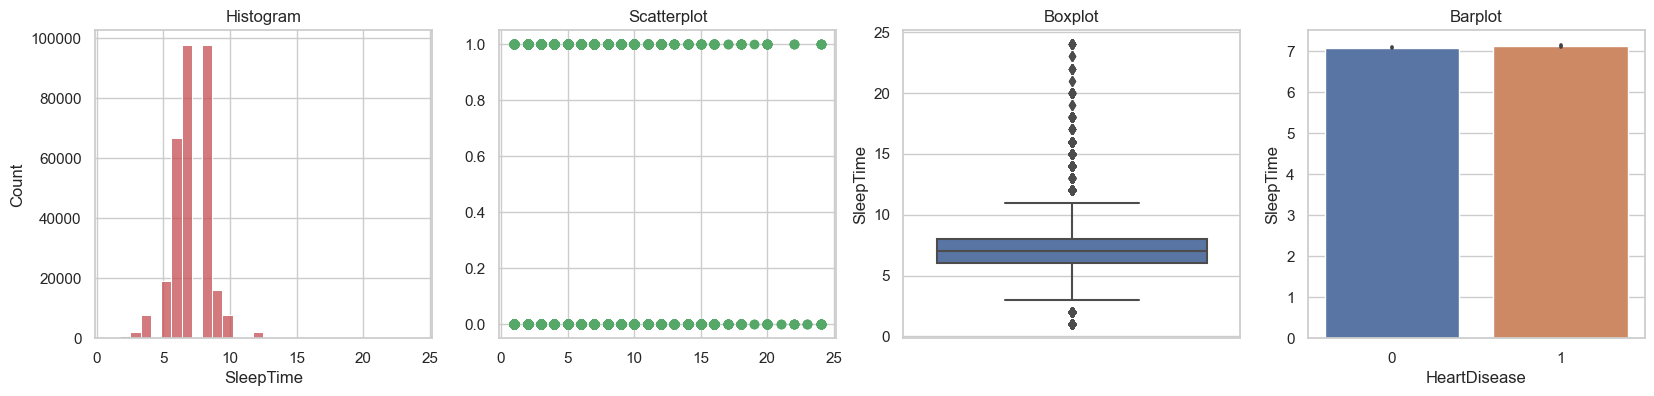

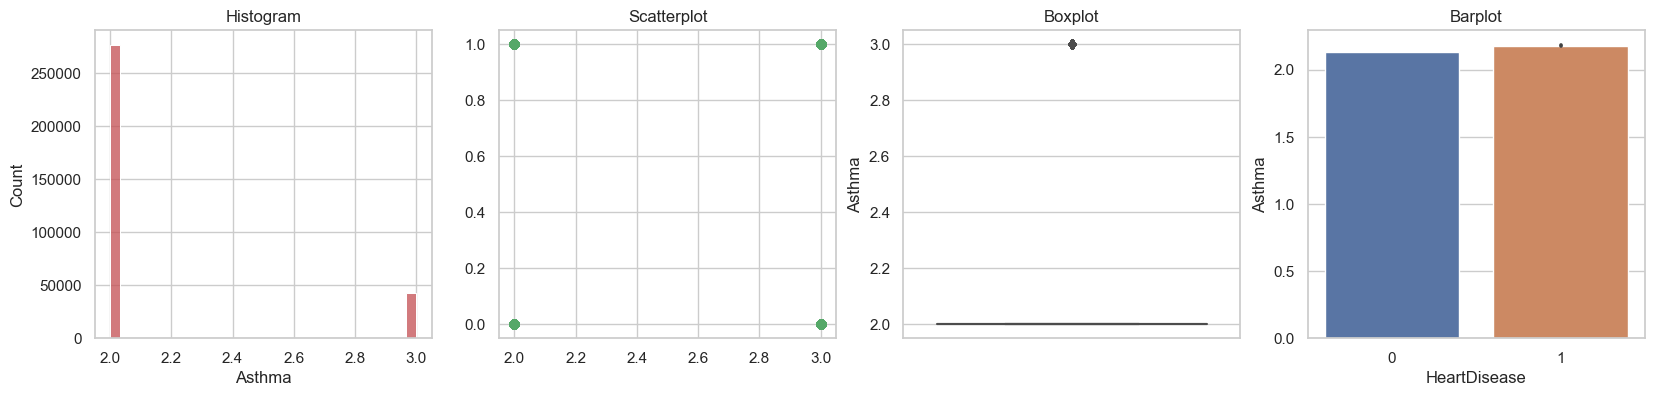

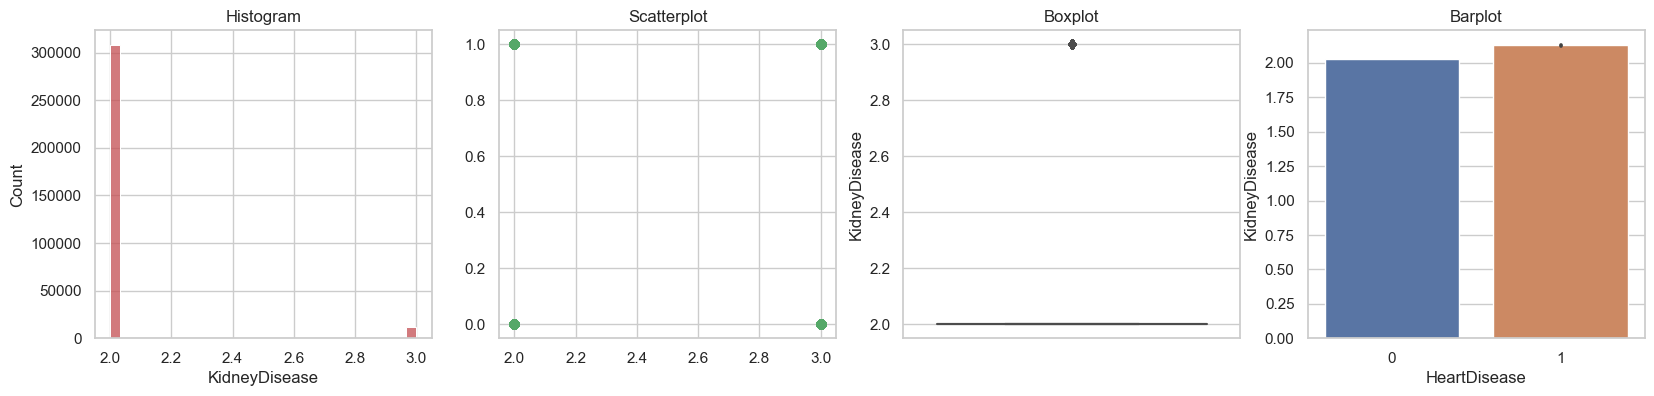

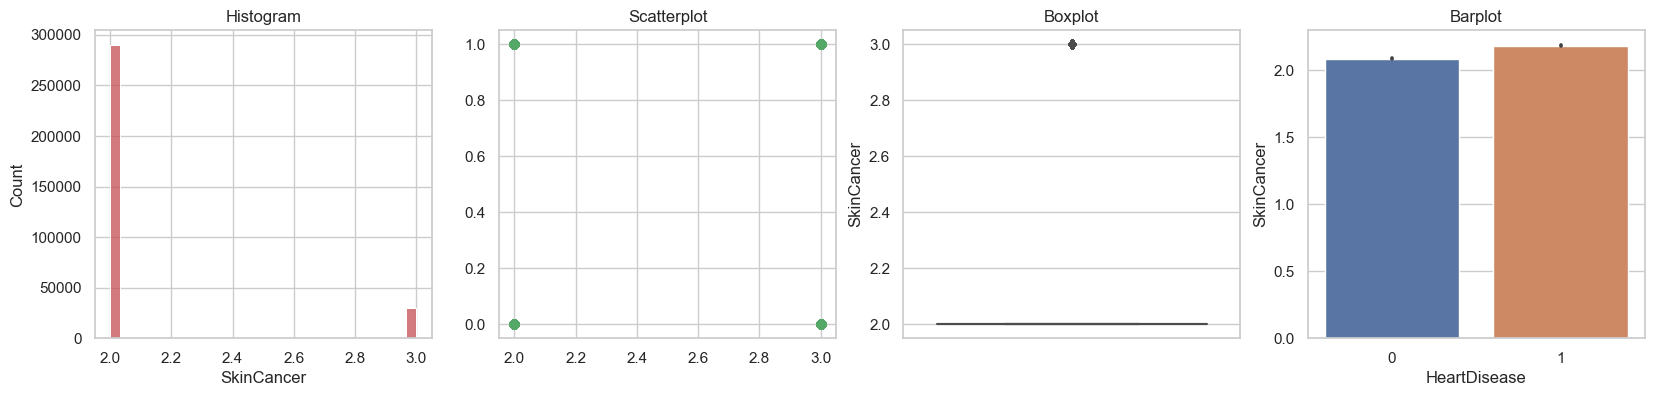

In [33]:
for variable in df2:
    diagnostic_plots(df2,variable,'HeartDisease')

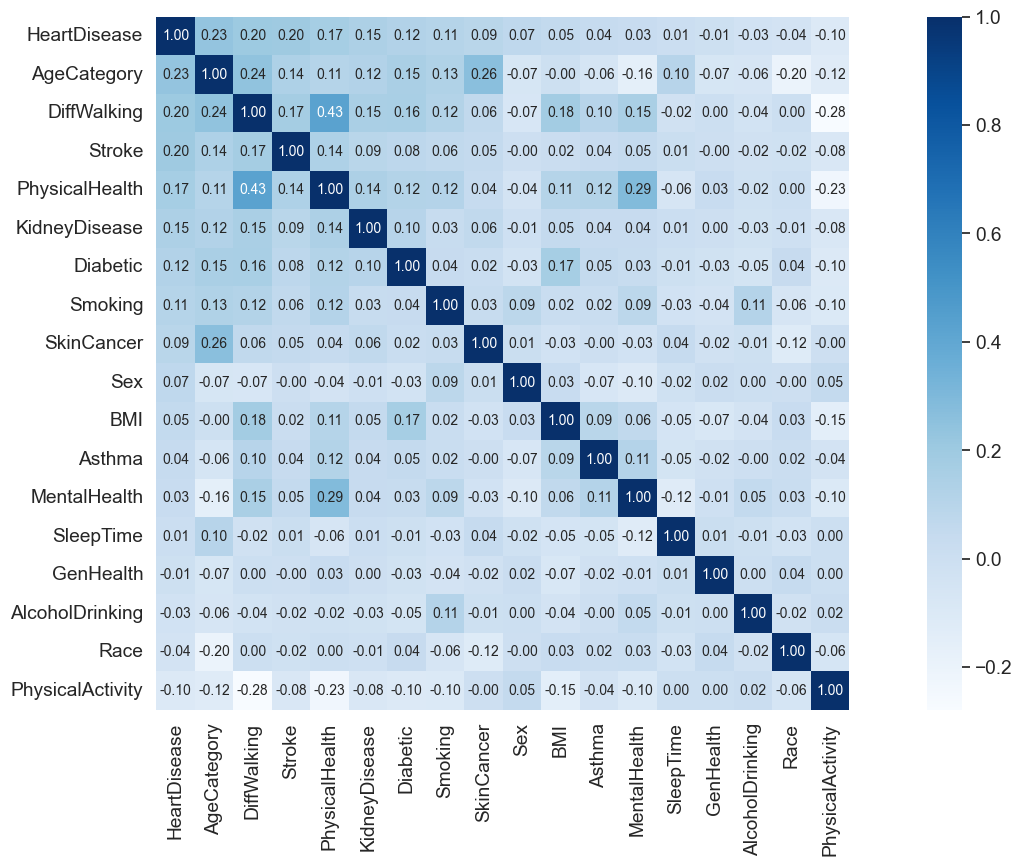

In [34]:
corr = df2.corr()
plt.figure(figsize=(20, 9))
k = 18 #number of variables for heatmap
cols = corr.nlargest(k, 'HeartDisease')['HeartDisease'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [35]:
df2.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## simple Logistic Regression Model :

In [36]:
df3= df2.copy()
df3.head(2)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        3                2       2             3.0   
1             0  20.34        2                2       3             0.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            2    2            9     2         3   
1           0.0            2    2           14     2         2   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 3          2        5.0       3              2           3  
1                 3          2        7.0       2              2           2

In [37]:
y=df3.pop('HeartDisease')
X= df3
print (X.shape)
print (y.shape)

(319795, 17)
(319795,)


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [57]:
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [61]:
kf=KFold(5)
result= cross_val_score(model,X_train,y_train,cv=kf)
print (result)
print (np.mean(result))

[0.91496274 0.91550128 0.91477164 0.91550128 0.91431996]
0.9150113788371004


In [59]:
cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 287815, Test set:31980
Fold:2, Train set: 287815, Test set:31980
Fold:3, Train set: 287815, Test set:31980
Fold:4, Train set: 287815, Test set:31980
Fold:5, Train set: 287815, Test set:31980
Fold:6, Train set: 287816, Test set:31979
Fold:7, Train set: 287816, Test set:31979
Fold:8, Train set: 287816, Test set:31979
Fold:9, Train set: 287816, Test set:31979
Fold:10, Train set: 287816, Test set:31979


In [40]:
model.intercept_

array([-14.12496903])

In [41]:
model.coef_

array([[ 0.01671224,  0.44209214, -0.33306462,  1.142458  ,  0.02220766,
         0.01060064,  0.42835372,  0.7394076 ,  0.28547002, -0.00415724,
         0.34177469, -0.11889459, -0.00440765, -0.03023217,  0.33315569,
         0.71907639,  0.11808951]])

In [42]:
y_pred=model.predict(X_test)

In [43]:
y_pred_proba=model.predict_proba(X_test)

In [44]:
print("accuracy_score: ",metrics.accuracy_score(y_test,y_pred))
print("f1_score: ",metrics.f1_score(y_test,y_pred))
print("recall_score: ",metrics.recall_score(y_test,y_pred))
print("precision_score: ",metrics.precision_score(y_test,y_pred))
print("confusion_matrix :\n ", metrics.confusion_matrix(y_test,y_pred))

accuracy_score:  0.9137273295809881
f1_score:  0.1337519623233909
recall_score:  0.07745454545454546
precision_score:  0.4896551724137931
confusion_matrix :
  [[29008   222]
 [ 2537   213]]


In [ ]:
#without KFold:

#accuracy_score:  0.9137273295809881
#f1_score:  0.1337519623233909
#recall_score:  0.07745454545454546
#precision_score:  0.4896551724137931
#confusion_matrix :
#  [[29008   222]
# [ 2537   213]]

## Polynomial Logistic Regression Model :

In [45]:
df4= df2.copy()
df4.head(3)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        3                2       2             3.0   
1             0  20.34        2                2       3             0.0   
2             0  26.58        3                2       2            20.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            2    2            9     2         3   
1           0.0            2    2           14     2         2   
2          30.0            2    3           11     2         3   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 3          2        5.0       3              2           3  
1                 3          2        7.0       2              2           2  
2                 3          3        8.0       3              2           2

In [46]:
y=df4.pop('HeartDisease')
X= df4

In [49]:
# Making a Function

#def check(Dimension,testsize):
#    rec = 0.07745454545454546
#    for column in X:
#        New_Col_Name = column + str(Dimension)
#        New_Col_Val=X[column] ** Dimension
#        X.insert(0,New_Col_Name,New_Col_Val)
#        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=testsize,random_state=0)
#        New_model=LogisticRegression(solver='liblinear')
#        New_model.fit(X_train,y_train)
#        y_pred=New_model.predict(X_test)
 #       rec_New=metrics.recall_score(y_test,y_pred)
#        if rec_New < rec:
#            X.drop([New_Col_Name],axis=1,inplace=True)
#        else:
#            rec=rec_New
#    print ('recall_score: ',rec )


In [50]:
#check(7,0.2)

In [51]:
# d5 =  0.08738755278134754
# d6 =  0.15990453460620524

## Naive Bayes:

In [120]:
df5=df1.copy()
df5

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [121]:
#df2['AgeCategory'].replace({'18-24':2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7,'50-54':8,'55-59':9,'60-64':10,'65-69':11,'70-74':12,'75-79':13,'80 or older':14},inplace=True)
df5['AgeOlder40']=df1['AgeCategory']
df5['AgeOlder40'].replace({'18-24':0,'25-29':0,'30-34':0,'35-39':0,'40-44':1,'45-49':1,'50-54':1,'55-59':1,'60-64':1,'65-69':1,'70-74':1,'75-79':1,'80 or older':1},inplace=True)
df5['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)
df5['Smoking'].replace({'Yes':1,'No':0},inplace=True)
df5['AlcoholDrinking'].replace({'Yes':1,'No':0},inplace=True)
df5['Stroke'].replace({'Yes':1,'No':0},inplace=True)
df5['DiffWalking'].replace({'Yes':1,'No':0},inplace=True)
df5['Sex'].replace({'Male':1,'Female':0},inplace=True)
df5['Diabetic'].replace({'Yes':1,'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1},inplace=True)
df5['PhysicalActivity'].replace({'Yes':1,'No':0},inplace=True)
df5['Asthma'].replace({'Yes':1,'No':0},inplace=True)
df5['KidneyDisease'].replace({'Yes':1,'No':0},inplace=True)
df5['SkinCancer'].replace({'Yes':1,'No':0},inplace=True)


In [122]:
df5.drop(columns=['AgeCategory','Race','GenHealth','MentalHealth','PhysicalHealth','BMI','SleepTime'],axis=1,inplace=True)
df5

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0                  0        1                0       0            0    0   
1                  0        0                0       1            0    0   
2                  0        1                0       0            0    1   
3                  0        0                0       0            0    0   
4                  0        0                0       0            1    0   
...              ...      ...              ...     ...          ...  ...   
319790             1        1                0       0            1    1   
319791             0        1                0       0            0    1   
319792             0        0                0       0            0    0   
319793             0        0                0       0            0    0   
319794             0        0                0       0            0    0   

        Diabetic  PhysicalActivity  Asthma  KidneyDisease  SkinCancer  \
0              1                 1       1              0           1   
1              0                 1       0              0           0   
2              1                 1       1              0           0   
3              0                 0       0              0           1   
4              0                 1       0              0           0   
...          ...               ...     ...            ...         ...   
319790         1                 0       1              0           0   
319791         0                 1       1              0           0   
319792         0                 1       0              0           0   
319793         0                 0       0              0           0   
319794         0                 1       0              0           0   

        AgeOlder40  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
319790           1  
319791           0  
319792           1  
319793           0  
319794           1  

[319795 rows x 12 columns]

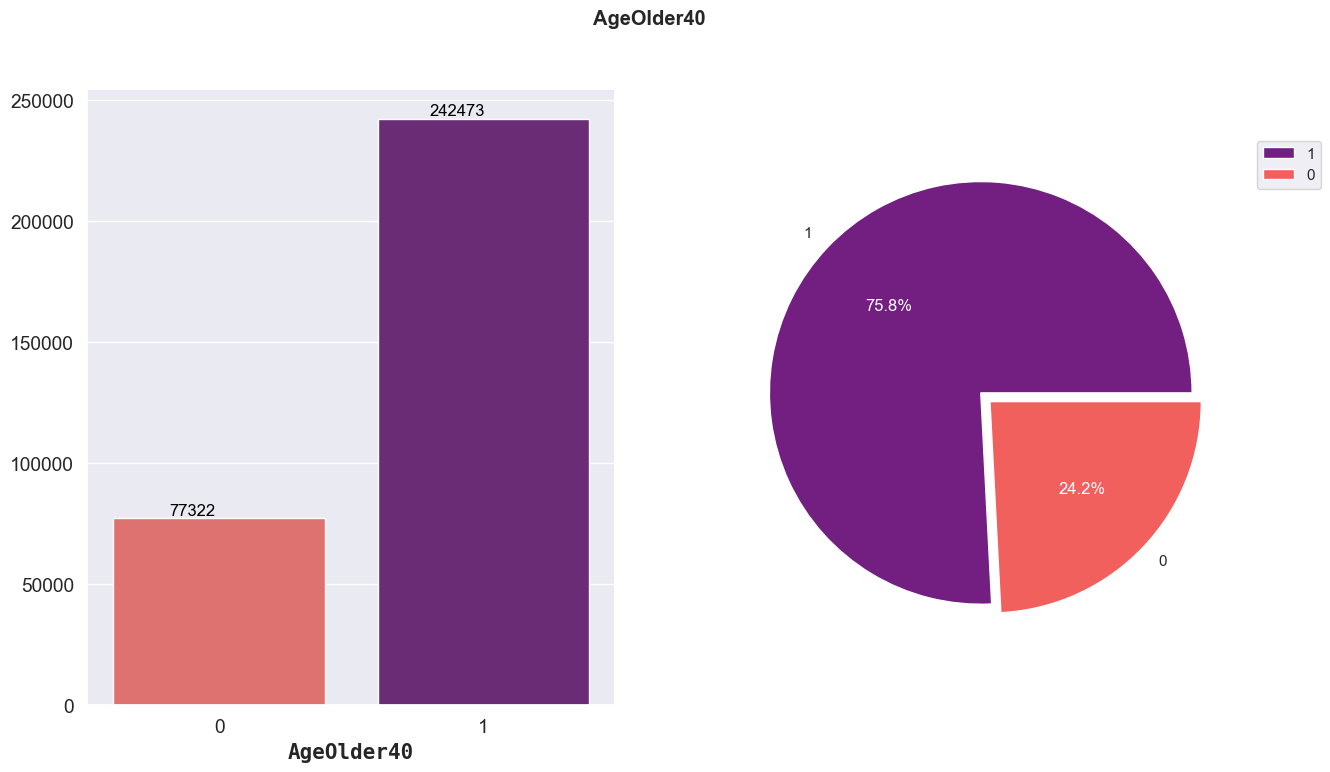

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df5['AgeOlder40'].value_counts().index
y=df5['AgeOlder40'].value_counts().values.tolist()
data = df5.groupby("AgeOlder40").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('AgeOlder40', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df5['AgeOlder40'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('AgeOlder40',weight = 'bold')
plt.show()

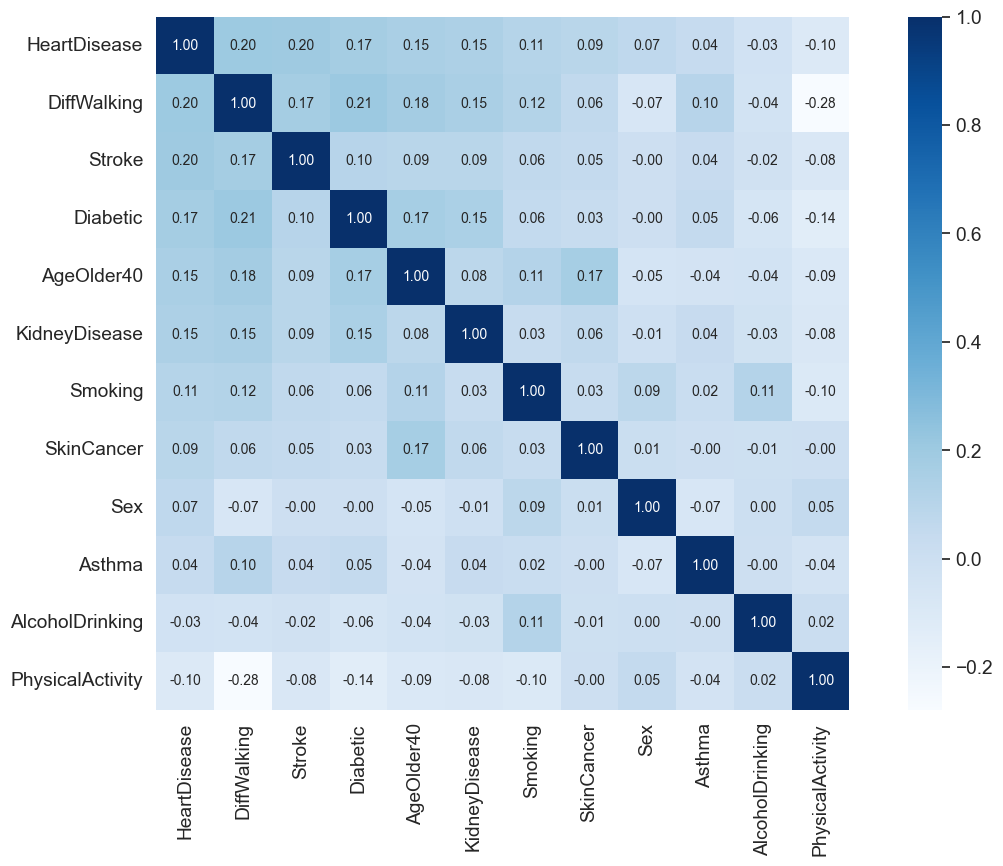

In [124]:
corr = df5.corr()
plt.figure(figsize=(15, 9))
k = 18 #number of variables for heatmap
cols = corr.nlargest(k, 'HeartDisease')['HeartDisease'].index
cm = np.corrcoef(df5[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [125]:
y=df5.pop('HeartDisease')
X=df5

In [134]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.1,random_state=0)

In [135]:
nbModel=BernoulliNB()

In [136]:
nbModel.fit(X_train,y_train)

BernoulliNB()

In [137]:
y_pred=nbModel.predict(X_test)

In [138]:
print("accuracy_score: ",metrics.accuracy_score(y_test,y_pred))
print("f1_score: ",metrics.f1_score(y_test,y_pred))
print("recall_score: ",metrics.recall_score(y_test,y_pred))
print("precision_score: ",metrics.precision_score(y_test,y_pred))
print("confusion_matrix :\n ", metrics.confusion_matrix(y_test,y_pred))

accuracy_score:  0.9013779636990299
f1_score:  0.2915616342626101
recall_score:  0.23680369739722695
precision_score:  0.37926108694240634
confusion_matrix :
  [[253590   9560]
 [ 18825   5841]]


In [ ]:
#without KFold:

#accuracy_score:  0.9137273295809881
#f1_score:  0.1337519623233909
#recall_score:  0.07745454545454546
#precision_score:  0.4896551724137931
#confusion_matrix :
#  [[29008   222]
# [ 2537   213]]